In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RepeatedKFold, cross_val_score

In [3]:

# 1️⃣ Show Key Statistics
data = pd.read_excel("C:/Users/ajayk/Downloads/Cars_leaned.xlsx") #fetch from sheetname
data.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000
mean,2020.599807,3.131666,5.610776,12.411656,9.193672,10.963175,27.520251,254.732763,4.550506,4.839320
std,2.477466,1.340042,1.903399,3.411809,2.187367,2.813596,7.512694,61.781550,1.556446,1.755687
min,2017.000000,1.000000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2018.000000,2.000000,4.000000,10.100000,7.600000,9.000000,22.000000,211.000000,4.000000,3.000000
50%,2020.000000,3.000000,6.000000,12.100000,8.900000,10.600000,27.000000,251.000000,5.000000,5.000000
75%,2023.000000,3.600000,6.000000,14.500000,10.400000,12.700000,31.000000,294.000000,5.000000,6.000000
max,2025.000000,8.400000,16.000000,30.700000,20.900000,26.100000,71.000000,608.000000,10.000000,8.000000


In [4]:
# Display data types of all columns
print(data.dtypes)

Model year                int64
Make                     object
Model                    object
Vehicle class            object
Engine size (L)         float64
Cylinders                 int64
Transmission             object
Fuel type                object
City (L/100 km)         float64
Highway (L/100 km)      float64
Combined (L/100 km)     float64
Combined (mpg)            int64
CO2 emissions (g/km)      int64
CO2 rating                int64
Smog rating               int64
dtype: object


In [5]:
import warnings
warnings.filterwarnings("ignore")
data.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2017,Acura,ILX,Compact,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,7,6
1,2017,Acura,MDX Hybrid AWD,Sport utility vehicle: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,6,6
2,2017,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,4,6
3,2017,Acura,MDX SH-AWD Elite,Sport utility vehicle: Small,3.5,6,AS9,Z,12.2,9.0,10.7,26,251,5,6
4,2017,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,6


In [6]:
# Drop NAN
data = data.dropna()

# Drop SMART column
data = data[data['Make'] != 'smart']

# Showing Total number of rows
row_count = data.shape[0]  # shape[0] gives the number of rows
print("Total number of rows:", row_count)
#print(df_cleaned['Make'].value_counts())

data.head()

Total number of rows: 8296


,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2017,Acura,ILX,Compact,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,7,6
1,2017,Acura,MDX Hybrid AWD,Sport utility vehicle: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,6,6
2,2017,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,4,6
3,2017,Acura,MDX SH-AWD Elite,Sport utility vehicle: Small,3.5,6,AS9,Z,12.2,9.0,10.7,26,251,5,6
4,2017,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,6


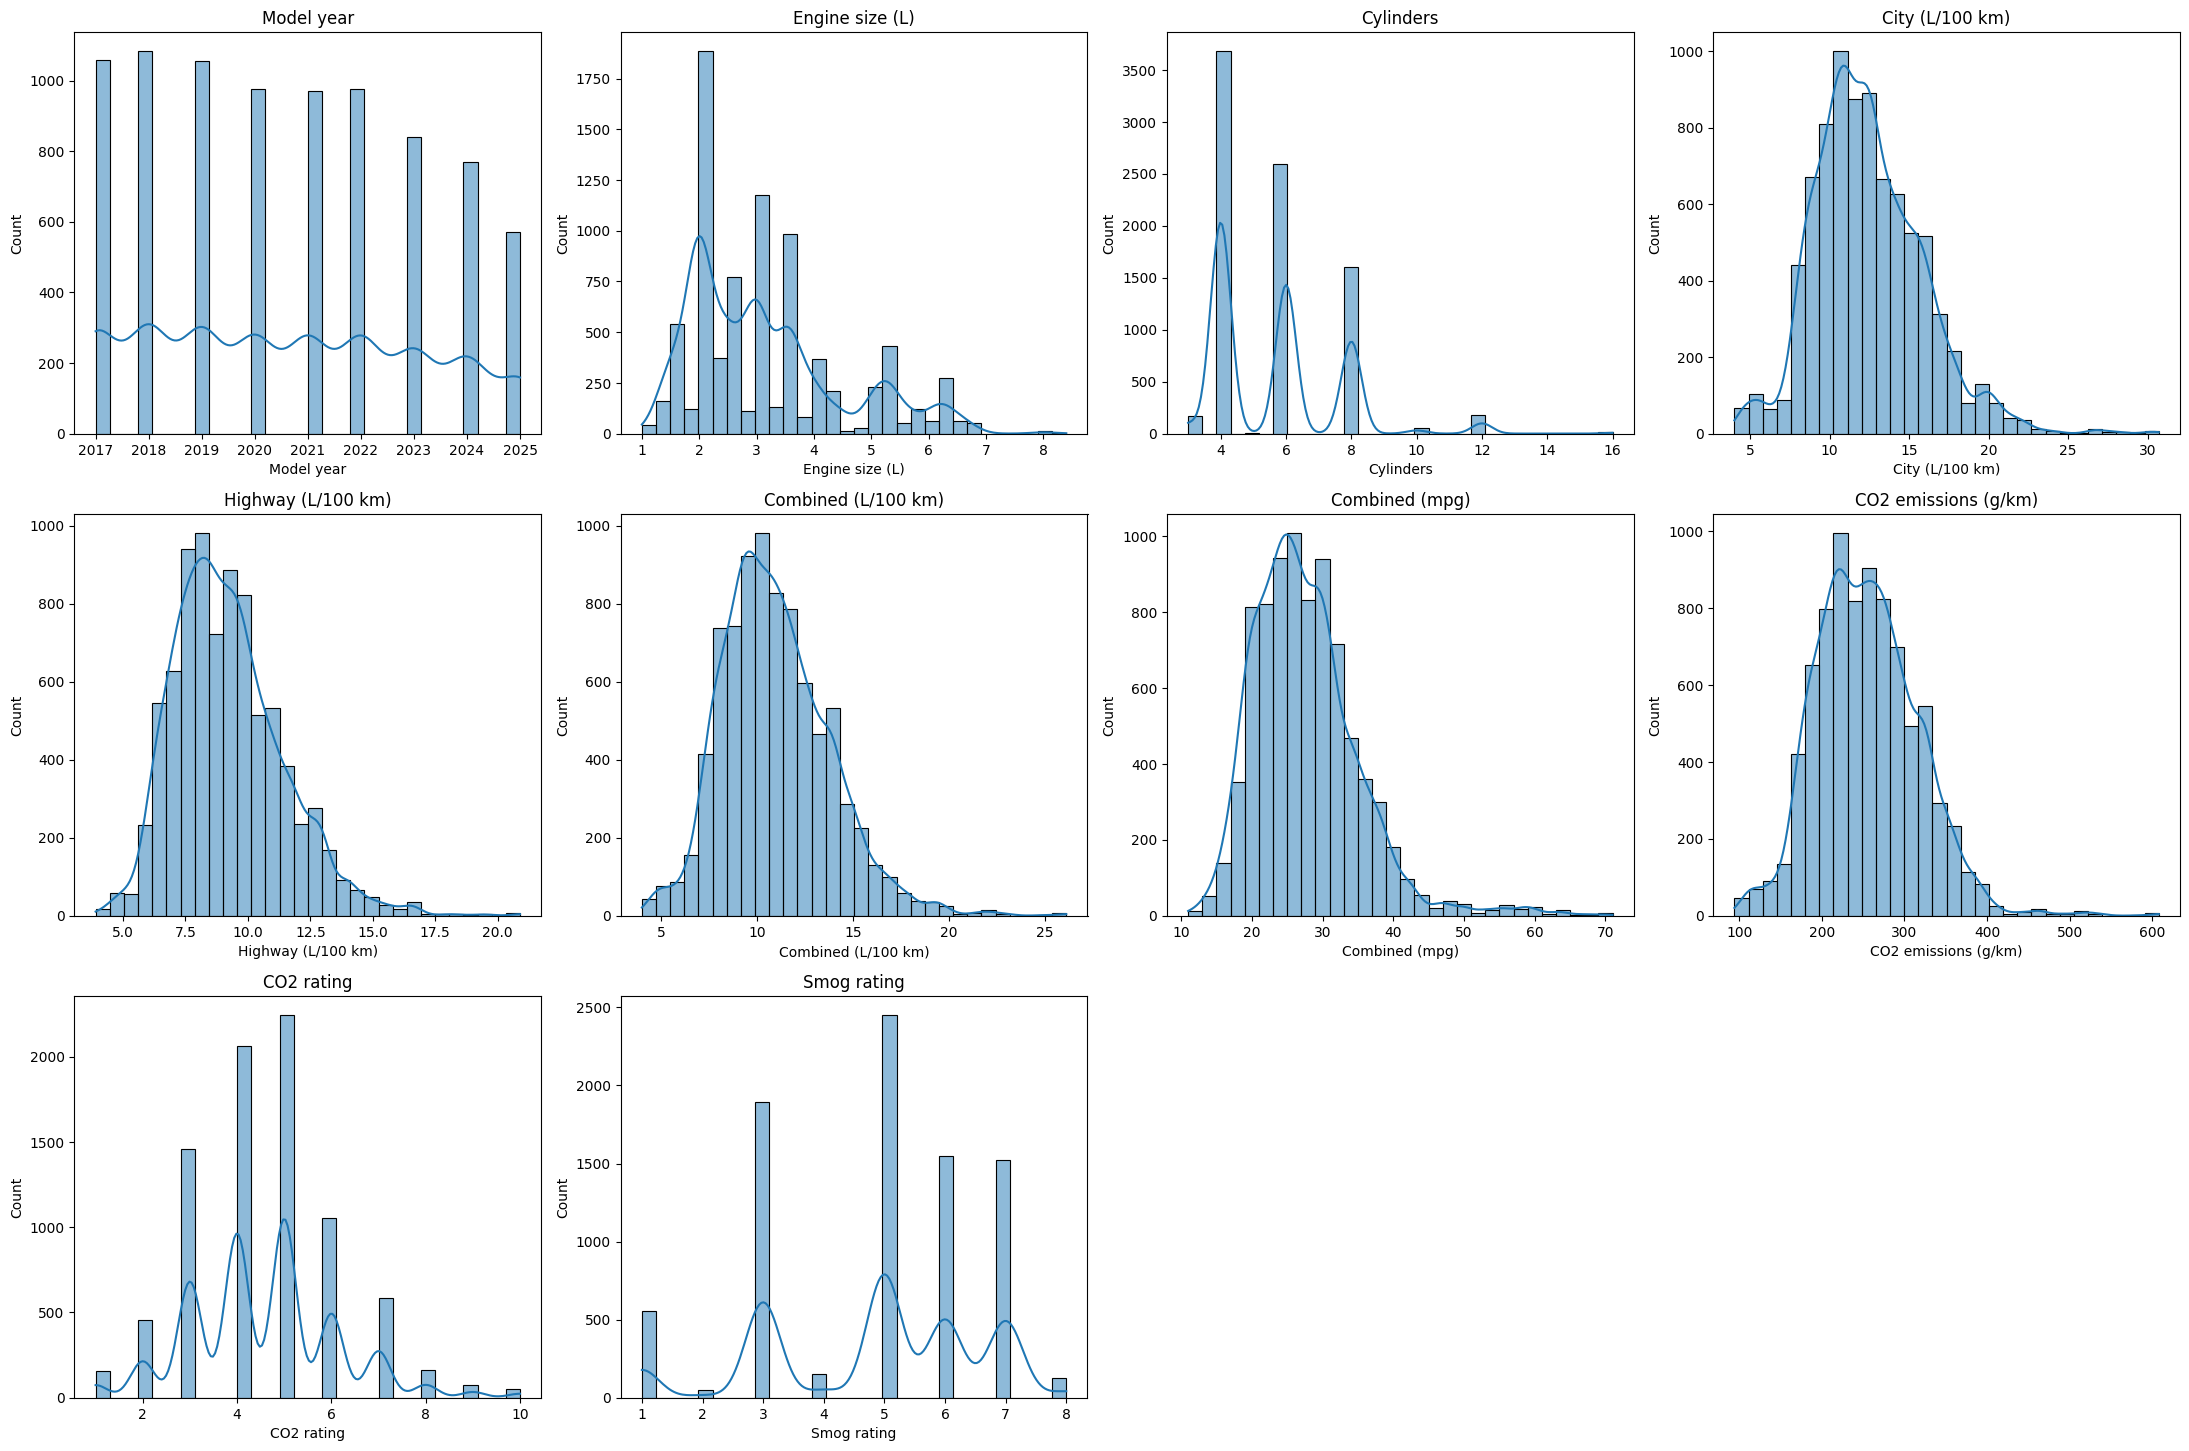

In [7]:
# 2️⃣ Visualize Data Distributions (Histograms)
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Plot histograms for numerical columns
plt.figure(figsize=(22, 19))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [8]:
# Testing Normality Using Shapiro Wilk Test
from scipy.stats import shapiro

for col in numerical_columns:
    print(col)
    stat, p = shapiro(data[col].dropna())
   #print('Statistics=%.3f, p=%.5f' % (stat, p))
    # Display results in scientific notation
    print(f"Testing Normality for: {col}")
    print(f'Statistics={stat:.5f}, p={p:.10e}')  # Display p-value in scientific notation
    # Interpret the result
    alpha = 0.05  
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Model year
Testing Normality for: Model year
Statistics=0.93621, p=0.0000000000e+00
Sample does not look Gaussian (reject H0)
Engine size (L)
Testing Normality for: Engine size (L)
Statistics=0.90260, p=0.0000000000e+00
Sample does not look Gaussian (reject H0)
Cylinders
Testing Normality for: Cylinders
Statistics=0.80354, p=0.0000000000e+00
Sample does not look Gaussian (reject H0)
City (L/100 km)
Testing Normality for: City (L/100 km)
Statistics=0.97332, p=1.2037042602e-36
Sample does not look Gaussian (reject H0)
Highway (L/100 km)
Testing Normality for: Highway (L/100 km)
Statistics=0.96659, p=5.0910574507e-40
Sample does not look Gaussian (reject H0)
Combined (L/100 km)
Testing Normality for: Combined (L/100 km)
Statistics=0.97447, p=5.2683782068e-36
Sample does not look Gaussian (reject H0)
Combined (mpg)
Testing Normality for: Combined (mpg)
Statistics=0.92582, p=0.0000000000e+00
Sample does not look Gaussian (reject H0)
CO2 emissions (g/km)
Testing Normality for: CO2 emissions 

QQ Plot for Model year


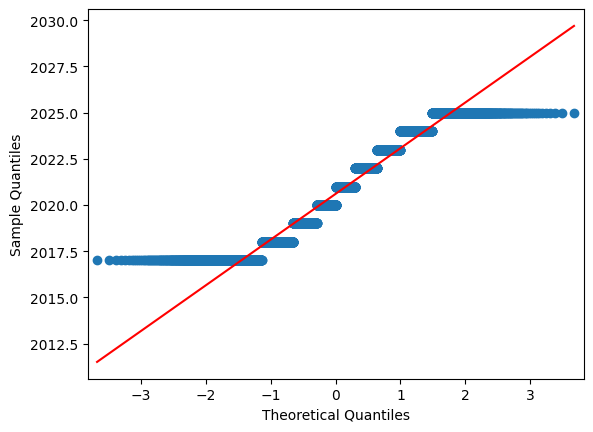

QQ Plot for Engine size (L)


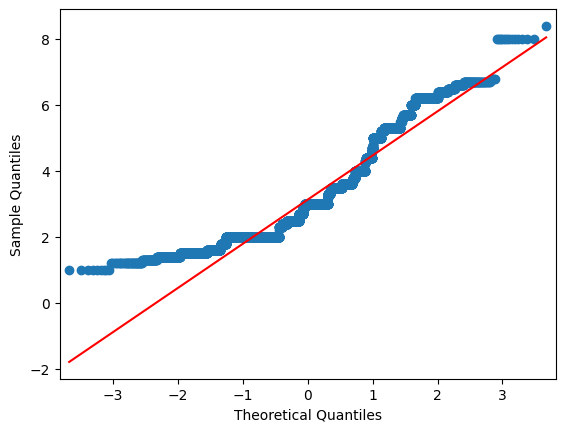

QQ Plot for Cylinders


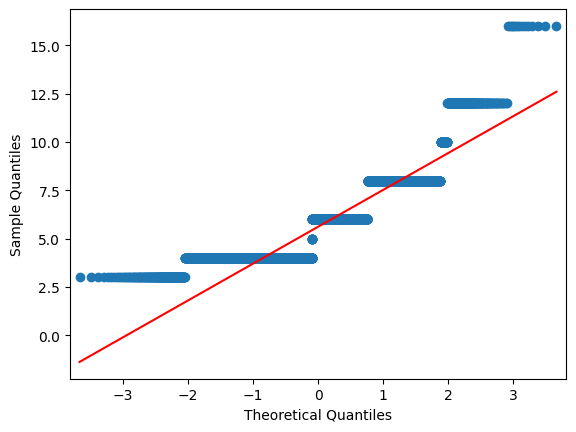

QQ Plot for City (L/100 km)


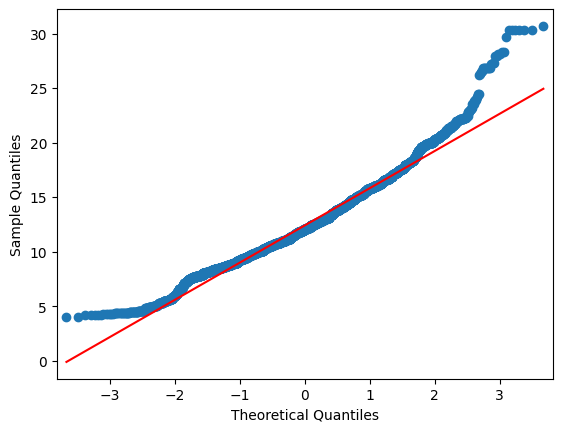

QQ Plot for Highway (L/100 km)


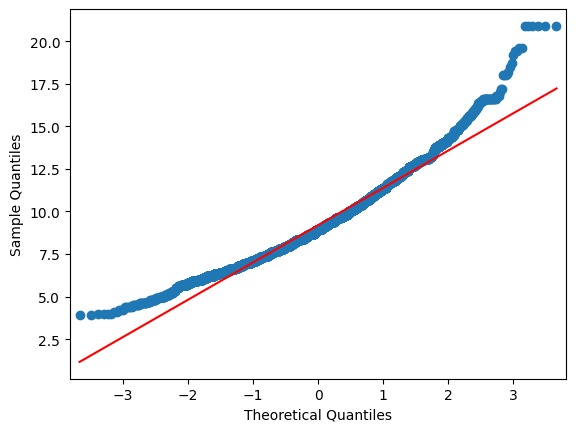

QQ Plot for Combined (L/100 km)


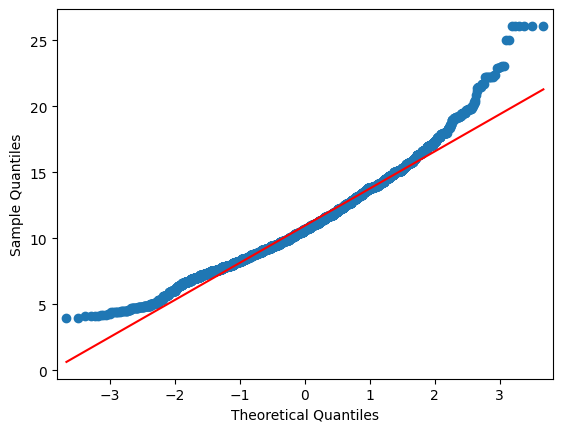

QQ Plot for Combined (mpg)


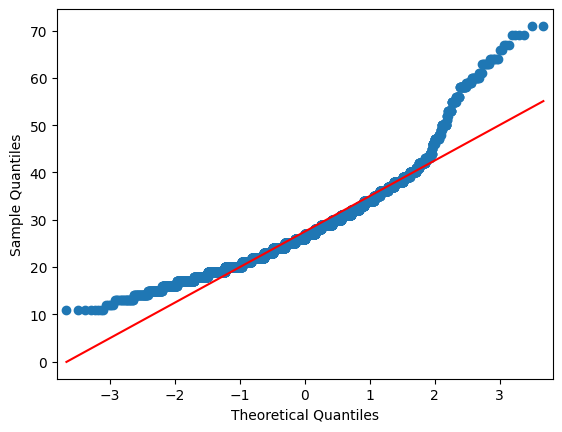

QQ Plot for CO2 emissions (g/km)


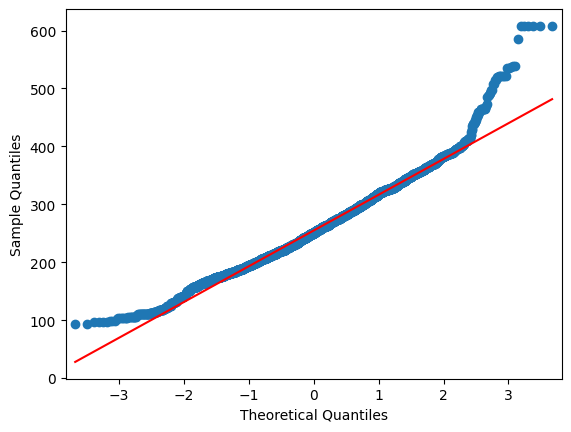

QQ Plot for CO2 rating


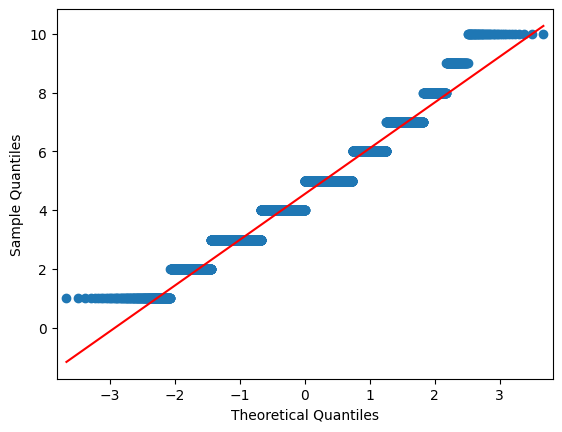

QQ Plot for Smog rating


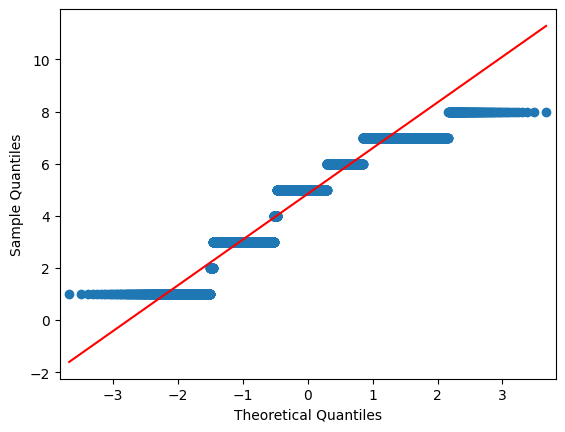

In [9]:
#Create QQ Plots

from statsmodels.graphics.gofplots import qqplot
import pylab

for col in numerical_columns:
    print(f"QQ Plot for {col}")
    qqplot(data[col].dropna(), line='s')
    pylab.show()

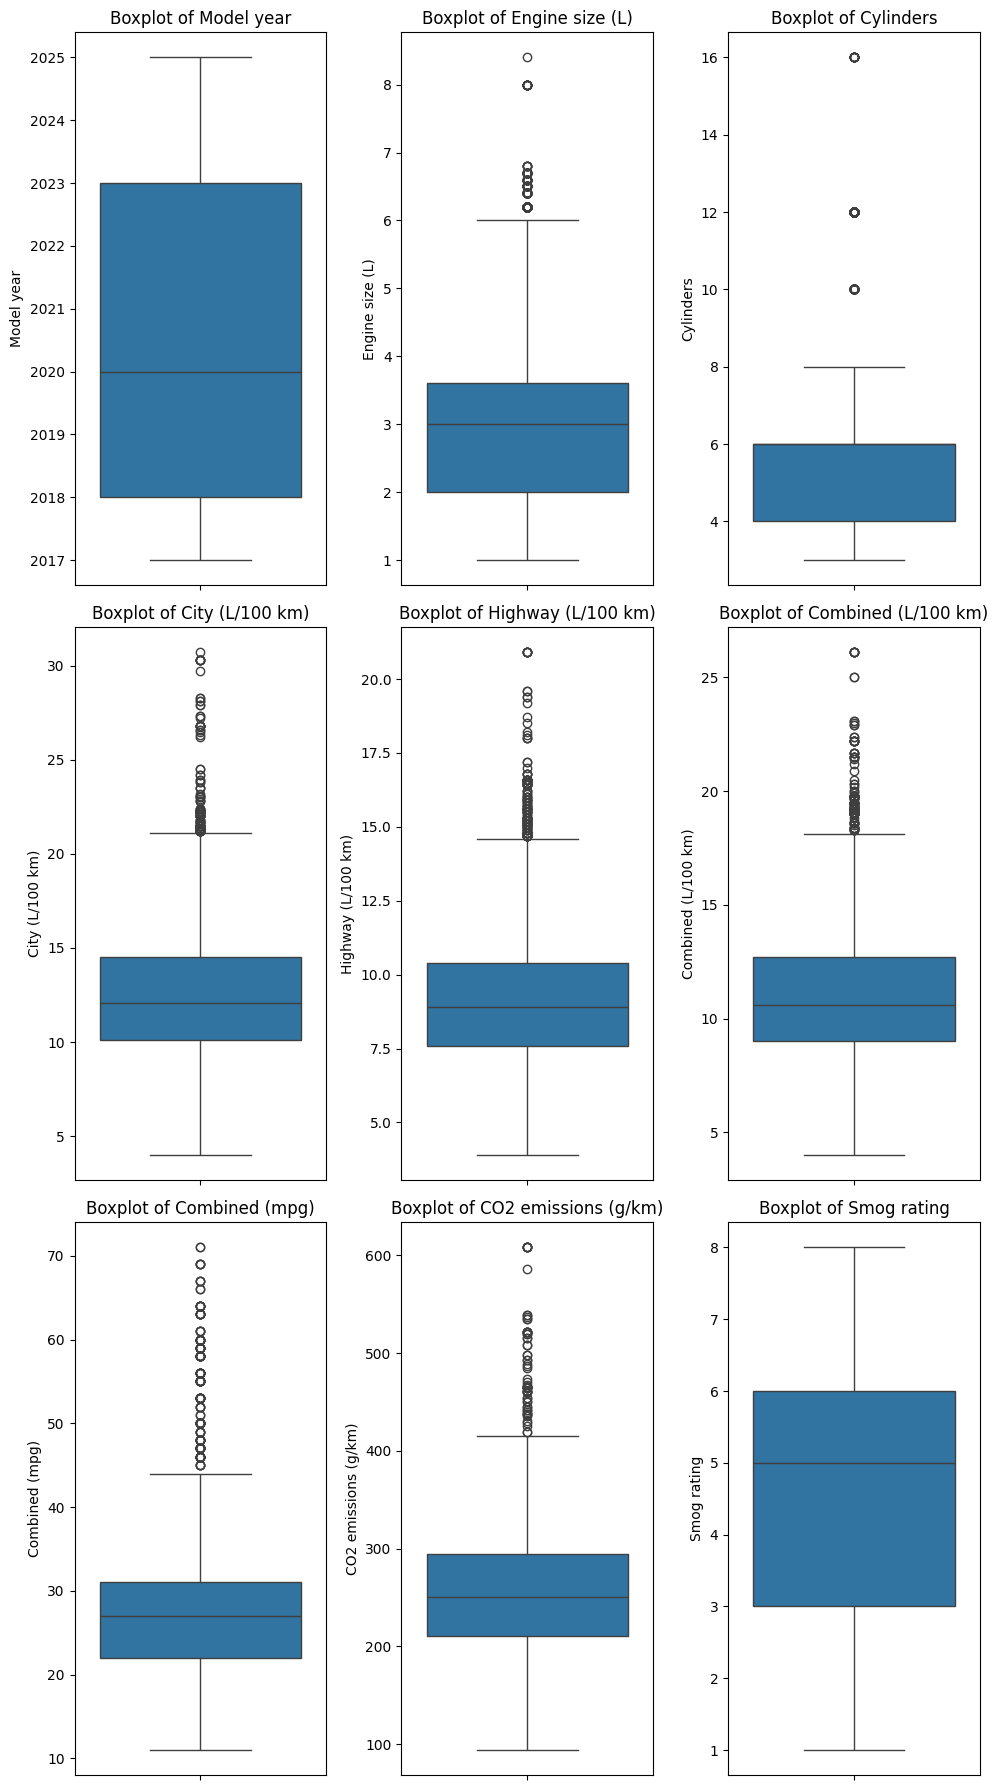

In [10]:
numerical_columns = ['Model year', 'Engine size (L)', 'Cylinders', 'City (L/100 km)', 
                     'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)', 
                     'CO2 emissions (g/km)', 'Smog rating']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 18))  # 3x3 grid for 9 features
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Plot a boxplot for each feature on its own subplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=axes[i])  # Seaborn for better aesthetics; use plt.boxplot() if preferred
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [11]:
# To find missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Model year              0
Make                    0
Model                   0
Vehicle class           0
Engine size (L)         0
Cylinders               0
Transmission            0
Fuel type               0
City (L/100 km)         0
Highway (L/100 km)      0
Combined (L/100 km)     0
Combined (mpg)          0
CO2 emissions (g/km)    0
CO2 rating              0
Smog rating             0
dtype: int64


In [12]:
# Make a Copy Before Encoding**
data2 = data.copy()

In [13]:
# ✅ **Map Vehicle Class to Passengers**
vehicle_class_mapping = {
    'Compact': 5, 'Minicompact': 4, 'Subcompact': 5, 'Mid-size': 6, 'Full-size': 6,
    'Station wagon: Small': 5, 'Station wagon: Mid-size': 7,
    'Sport utility vehicle: Small': 5, 'Sport utility vehicle: Standard': 8,
    'Pickup truck: Small': 5, 'Pickup truck: Standard': 6,
    'Minivan': 8, 'Van: Passenger': 15, 'Two-seater': 2,
    'Special purpose vehicle': None  # Placeholder, will be assigned below
}

# Special Purpose Vehicle Mapping Based on Model
special_purpose_mapping = {
    'City Express': 2, 'Metris Cargo': 2, 'NV200 Cargo Van': 2,
    'ProMaster City': 5, 'Transit Connect Van FFV': 5, 'Transit Connect Van': 5, 'Transit Connect Wagon LWB': 6,
    'Transit Connect Wagon LWB FFV': 6, 'Metris Passenger Van': 6, 'Metris Passenger': 6,
    'MKT Livery AWD': 7, 'Transit Connect Wagon LWB': 6
}

# Apply standard vehicle class mapping
data2['Passengers'] = data2['Vehicle class'].map(vehicle_class_mapping)

# Assign correct passenger values for special purpose vehicles based on model name
for model_name, passenger_count in special_purpose_mapping.items():
    data2.loc[data2['Model'].str.contains(model_name, na=False, case=False), 'Passengers'] = passenger_count
    
# **Drop Vehicle Class (But Keep Make & Model for Identification)**
data2.drop(columns=['Vehicle class'], inplace=True)

# **Check Transformation**
print(data2[['Make', 'Model', 'Passengers']])

       Make             Model  Passengers
0     Acura               ILX         5.0
1     Acura    MDX Hybrid AWD         5.0
2     Acura        MDX SH-AWD         5.0
3     Acura  MDX SH-AWD Elite         5.0
4     Acura               NSX         2.0
...     ...               ...         ...
8291  Volvo     V60 CC B5 AWD         5.0
8292  Volvo     V90 CC B6 AWD         7.0
8293  Volvo       XC40 B5 AWD         5.0
8294  Volvo       XC60 B5 AWD         5.0
8295  Volvo       XC90 B6 AWD         8.0

[8296 rows x 3 columns]


In [14]:
data2.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Passengers
count,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000,8296.000000
mean,2020.599807,3.131666,5.610776,12.411656,9.193672,10.963175,27.520251,254.732763,4.550506,4.839320,5.560391
std,2.477466,1.340042,1.903399,3.411809,2.187367,2.813596,7.512694,61.781550,1.556446,1.755687,1.458105
min,2017.000000,1.000000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000,2.000000
25%,2018.000000,2.000000,4.000000,10.100000,7.600000,9.000000,22.000000,211.000000,4.000000,3.000000,5.000000
50%,2020.000000,3.000000,6.000000,12.100000,8.900000,10.600000,27.000000,251.000000,5.000000,5.000000,5.000000
75%,2023.000000,3.600000,6.000000,14.500000,10.400000,12.700000,31.000000,294.000000,5.000000,6.000000,6.000000
max,2025.000000,8.400000,16.000000,30.700000,20.900000,26.100000,71.000000,608.000000,10.000000,8.000000,15.000000


In [15]:
print(data2.isnull().sum())
missing_rows = data2[data2.isnull().any(axis=1)]
print(missing_rows)


Model year              0
Make                    0
Model                   0
Engine size (L)         0
Cylinders               0
Transmission            0
Fuel type               0
City (L/100 km)         0
Highway (L/100 km)      0
Combined (L/100 km)     0
Combined (mpg)          0
CO2 emissions (g/km)    0
CO2 rating              0
Smog rating             0
Passengers              0
dtype: int64
Empty DataFrame
Columns: [Model year, Make, Model, Engine size (L), Cylinders, Transmission, Fuel type, City (L/100 km), Highway (L/100 km), Combined (L/100 km), Combined (mpg), CO2 emissions (g/km), CO2 rating, Smog rating, Passengers]
Index: []


In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ✅ **1️⃣ One-Hot Encoding `Make` Column (Mapping Brands to Parent Companies)**
brand_mapping = {
    'Toyota': 'Toyota', 'Lexus': 'Toyota', 'Mazda': 'Toyota', 'Subaru': 'Toyota',
    'Volkswagen': 'Volkswagen Group', 'Audi': 'Volkswagen Group', 'Porsche': 'Volkswagen Group', 'Bentley': 'Volkswagen Group', 
    'Bugatti': 'Volkswagen Group', 'Lamborghini': 'Volkswagen Group', 
    'Chevrolet': 'General Motors', 'GMC': 'General Motors', 'Cadillac': 'General Motors', 'Buick': 'General Motors',
    'Ford': 'Ford Motor Company', 'Lincoln': 'Ford Motor Company', 'Jaguar': 'Ford Motor Company',
    'Chrysler': 'Stellantis', 'Dodge': 'Stellantis', 'Jeep': 'Stellantis', 'Ram': 'Stellantis', 
    'FIAT': 'Stellantis', 'Maserati': 'Stellantis', 'Alfa Romeo': 'Stellantis',
    'Honda': 'Honda', 'Acura': 'Honda',
    'Hyundai': 'Hyundai Motor Group', 'Kia': 'Hyundai Motor Group', 'Genesis': 'Hyundai Motor Group',
    'BMW': 'BMW Group', 'MINI': 'BMW Group', 'Rolls-Royce': 'BMW Group',
    'Mercedes-Benz': 'Mercedes-Benz Group', 'Aston Martin': 'Mercedes-Benz Group',
    'Nissan': 'Nissan-Renault Alliance', 'Infiniti': 'Nissan-Renault Alliance', 'Mitsubishi': 'Nissan-Renault Alliance',
    'Ferrari': 'Ferrari', 'Land Rover': 'Tata', 'Jaguar': 'Tata', 'Volvo': 'Volvo'
}

# ✅ Apply mapping to 'Make' column
if 'Make' in data2.columns:
    data2['Make'] = data2['Make'].map(brand_mapping)

# ✅ **2️⃣ Reducing Transmission Types**
transmission_mapping = {
    'M5': 'Manual', 'M6': 'Manual', 'M7': 'Manual',
    'A4': 'Automatic', 'A5': 'Automatic', 'A6': 'Automatic', 'A7': 'Automatic', 'A8': 'Automatic', 'A9': 'Automatic', 'A10': 'Automatic',
    'AS5': 'Automated Manual', 'AS6': 'Automated Manual', 'AS7': 'Automated Manual', 'AS8': 'Automated Manual', 'AS9': 'Automated Manual', 'AS10': 'Automated Manual',
    'AM6': 'Dual-Clutch', 'AM7': 'Dual-Clutch', 'AM8': 'Dual-Clutch', 'AM9': 'Dual-Clutch',
    'AV': 'CVT', 'AV6': 'CVT', 'AV7': 'CVT', 'AV8': 'CVT', 'AV10': 'CVT', 'AV1': 'CVT'
}

# ✅ Apply mapping to `Transmission`
if 'Transmission' in data2.columns:
    data2['Transmission'] = data2['Transmission'].map(transmission_mapping)

# ✅ **3️⃣ One-Hot Encoding `Fuel Type` Column**
fuel_mapping = {
    'Diesel': 'D',
    'E85': 'E',
    'Regular gasoline': 'X',
    'Premium gasoline': 'Z'
}

# ✅ **4️⃣ Apply One-Hot Encoding Using `OneHotEncoder` from `sklearn`**
ohe = OneHotEncoder(drop='first', sparse_output=False)  # `drop='first'` avoids multicollinearity

# ✅ Select categorical columns to encode
categorical_cols = ['Make', 'Transmission', 'Fuel type']
data_categorical = data2[categorical_cols]

# ✅ Apply One-Hot Encoding
ohe.fit(data_categorical)
encoded_data = ohe.transform(data_categorical)

# ✅ Get new feature names
feature_names = ohe.get_feature_names_out(categorical_cols)

# ✅ Create DataFrame with Encoded Data
data_encoded = pd.DataFrame(encoded_data, columns=feature_names).astype(int)

# ✅ Combine with the original DataFrame (excluding the original categorical columns)
data3 = pd.concat([data2.drop(columns=categorical_cols), data_encoded], axis=1)

# ✅ **Final Check**
print("Final dataset shape:", data3.shape)
print(data3.head())

Final dataset shape: (8296, 31)
   Model year             Model  Engine size (L)  Cylinders  City (L/100 km)  \
0        2017               ILX              2.4          4              9.4   
1        2017    MDX Hybrid AWD              3.0          6              9.1   
2        2017        MDX SH-AWD              3.5          6             12.6   
3        2017  MDX SH-AWD Elite              3.5          6             12.2   
4        2017               NSX              3.5          6             11.1   

   Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                 6.8                  8.2              34   
1                 9.0                  9.0              31   
2                 9.0                 11.0              26   
3                 9.0                 10.7              26   
4                10.8                 11.0              26   

   CO2 emissions (g/km)  CO2 rating  ...  Make_Toyota  Make_Volkswagen Group  \
0                   192           

In [17]:
# Drop Model Column
data3 = data3.drop(columns=["Model"])

# Display data types of all columns
print(data3.dtypes)

Model year                        int64
Engine size (L)                 float64
Cylinders                         int64
City (L/100 km)                 float64
Highway (L/100 km)              float64
Combined (L/100 km)             float64
Combined (mpg)                    int64
CO2 emissions (g/km)              int64
CO2 rating                        int64
Smog rating                       int64
Passengers                      float64
Make_Ferrari                      int32
Make_Ford Motor Company           int32
Make_General Motors               int32
Make_Honda                        int32
Make_Hyundai Motor Group          int32
Make_Mercedes-Benz Group          int32
Make_Nissan-Renault Alliance      int32
Make_Stellantis                   int32
Make_Tata                         int32
Make_Toyota                       int32
Make_Volkswagen Group             int32
Make_Volvo                        int32
Transmission_Automatic            int32
Transmission_CVT                  int32



Correlation Matrix (Spearman):
                      Model year  Engine size (L)  Cylinders  City (L/100 km)  \
Model year              1.000000         0.003734  -0.009079        -0.001173   
Engine size (L)         0.003734         1.000000   0.938521         0.856627   
Cylinders              -0.009079         0.938521   1.000000         0.842920   
City (L/100 km)        -0.001173         0.856627   0.842920         1.000000   
Highway (L/100 km)      0.062269         0.785257   0.762387         0.939314   
Combined (L/100 km)     0.022791         0.841185   0.823885         0.992006   
Combined (mpg)         -0.022583        -0.840634  -0.823854        -0.991057   
CO2 emissions (g/km)    0.043779         0.844496   0.832146         0.969817   
CO2 rating             -0.025953        -0.827675  -0.814380        -0.943341   
Smog rating             0.070781        -0.409669  -0.453253        -0.452364   
Passengers              0.052316         0.309309   0.295740         0.257953

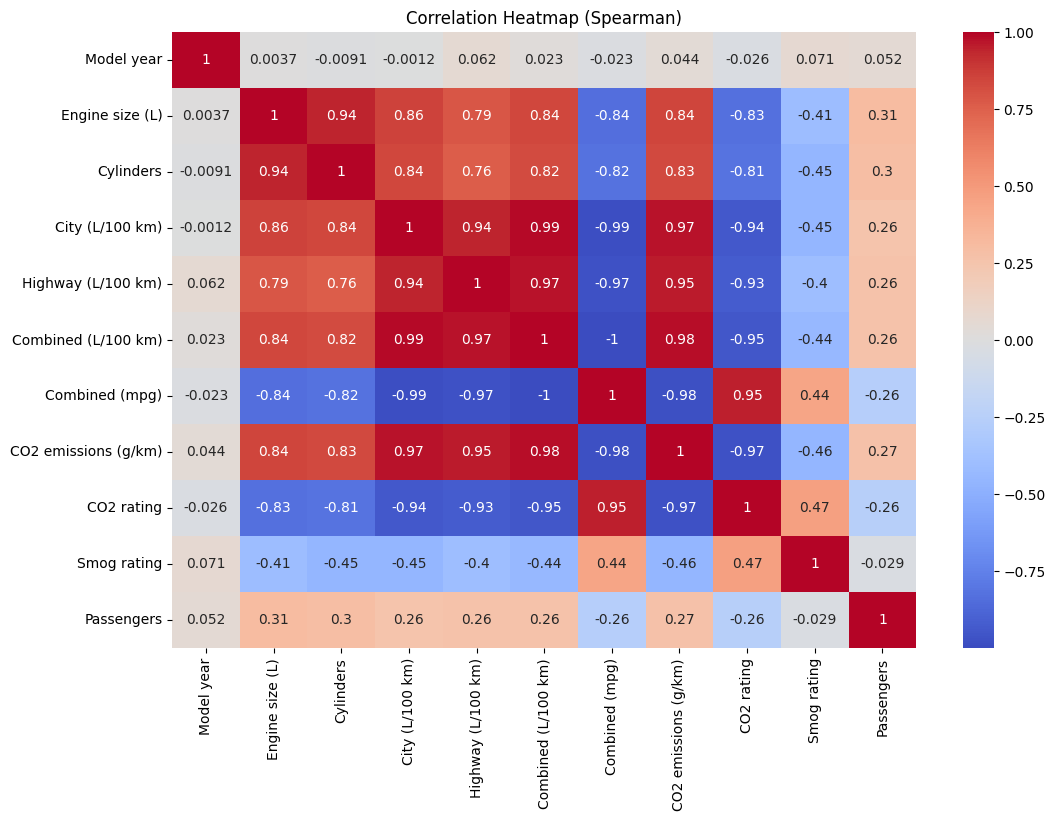

In [18]:
numeric_cols = data2.select_dtypes(include=[np.number]).columns
df = data2[numeric_cols]
corr_matrix = df.corr(method='spearman')
print("\nCorrelation Matrix (Spearman):")
print(corr_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Spearman)")
plt.show()

In [19]:
#Find Independent Column Correlations
def correlation(df,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=df.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(df,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('Cylinders', 'Engine size (L)'), ('City (L/100 km)', 'Engine size (L)'), ('City (L/100 km)', 'Cylinders'), ('Highway (L/100 km)', 'City (L/100 km)'), ('Combined (L/100 km)', 'Engine size (L)'), ('Combined (L/100 km)', 'Cylinders'), ('Combined (L/100 km)', 'City (L/100 km)'), ('Combined (L/100 km)', 'Highway (L/100 km)'), ('Combined (mpg)', 'City (L/100 km)'), ('Combined (mpg)', 'Highway (L/100 km)'), ('Combined (mpg)', 'Combined (L/100 km)'), ('CO2 emissions (g/km)', 'Engine size (L)'), ('CO2 emissions (g/km)', 'Cylinders'), ('CO2 emissions (g/km)', 'City (L/100 km)'), ('CO2 emissions (g/km)', 'Highway (L/100 km)'), ('CO2 emissions (g/km)', 'Combined (L/100 km)'), ('CO2 emissions (g/km)', 'Combined (mpg)'), ('CO2 rating', 'City (L/100 km)'), ('CO2 rating', 'Highway (L/100 km)'), ('CO2 rating', 'Combined (L/100 km)'), ('CO2 rating', 'Combined (mpg)'), ('CO2 rating', 'CO2 emissions (g/km)')]


In [20]:
corr_values = df.corr().unstack().reset_index()
print(corr_values.shape)
corr_values2 = corr_values[corr_values['level_0'] > corr_values['level_1']]
print(corr_values2.shape)
corr_values2.columns = ['var1', 'var2', 'corr_value']
corr_values2['corr_abs'] = corr_values2['corr_value'].abs()
corr_values2.sort_values('corr_abs', ascending=False, inplace=True)
corr_values2.head(10)

(121, 3)
(55, 3)


,var1,var2,corr_value,corr_abs
58,Combined (L/100 km),City (L/100 km),0.991093,0.991093
49,Highway (L/100 km),Combined (L/100 km),0.967883,0.967883
62,Combined (L/100 km),CO2 emissions (g/km),0.956808,0.956808
40,City (L/100 km),CO2 emissions (g/km),0.951233,0.951233
95,CO2 rating,CO2 emissions (g/km),-0.946069,0.946069
74,Combined (mpg),CO2 rating,0.933674,0.933674
47,Highway (L/100 km),City (L/100 km),0.926290,0.926290
13,Engine size (L),Cylinders,0.922445,0.922445
51,Highway (L/100 km),CO2 emissions (g/km),0.920661,0.920661
71,Combined (mpg),Combined (L/100 km),-0.920455,0.920455


Model Evaluation - RMSE Scores
Linear Regression: 2.91
Ridge: 2.91
XGBoost: 2.85


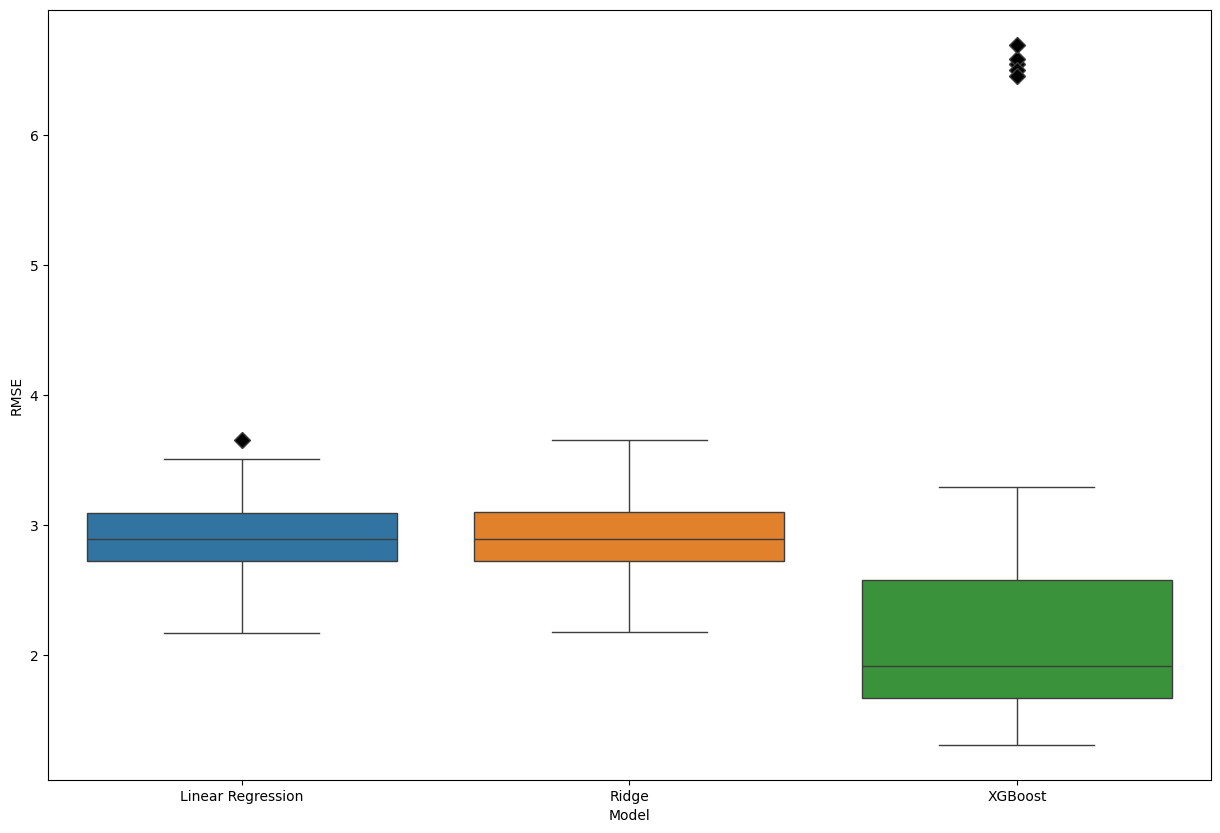

In [21]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor

# Define features (X) and target variable (y)
X = data3.drop('CO2 emissions (g/km)', axis=1).to_numpy()
y = data3['CO2 emissions (g/km)'].to_numpy()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X_scaled = sc.transform(X)

# Define models to evaluate
alpha = 1.00
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge(alpha=alpha, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

# Evaluate models using cross-validation
results = []
names = []
scoring = 'neg_mean_squared_error'

print('Model Evaluation - RMSE Scores')
for name, model in models:
    rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
    cv_results = cross_val_score(model, X_scaled, y, cv=rkf, scoring=scoring)
    results.append(np.sqrt(-cv_results))
    names.append(name)
    print(f'{name}: {np.sqrt(-cv_results.mean()):.2f}')

# Boxplot View of Model Performance
plt.figure(figsize=(15, 10))
fig.suptitle('Model Comparison')
sns.boxplot(data=results, flierprops={'marker': 'D', 'markersize': 8, 'markerfacecolor': 'black'})
plt.xticks(ticks=range(len(names)), labels=names) 
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()



Learning Curve - Linear Regression


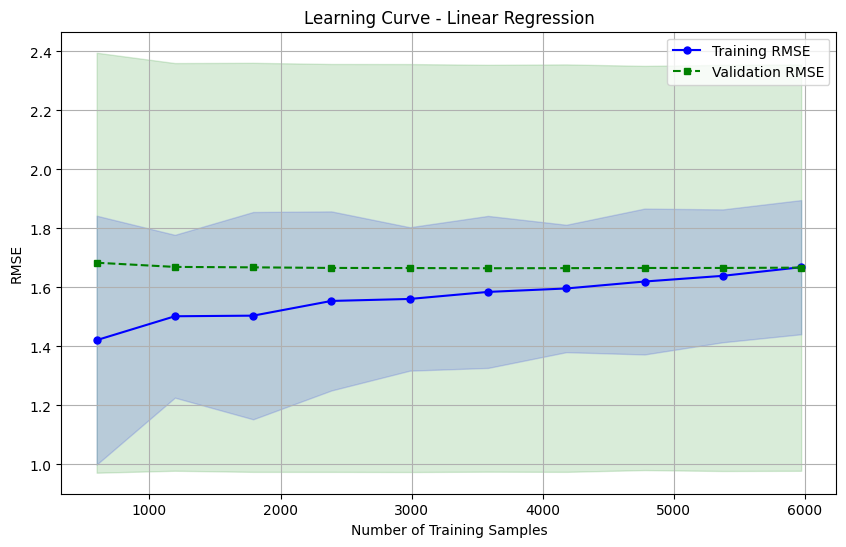

Learning Curve - Ridge


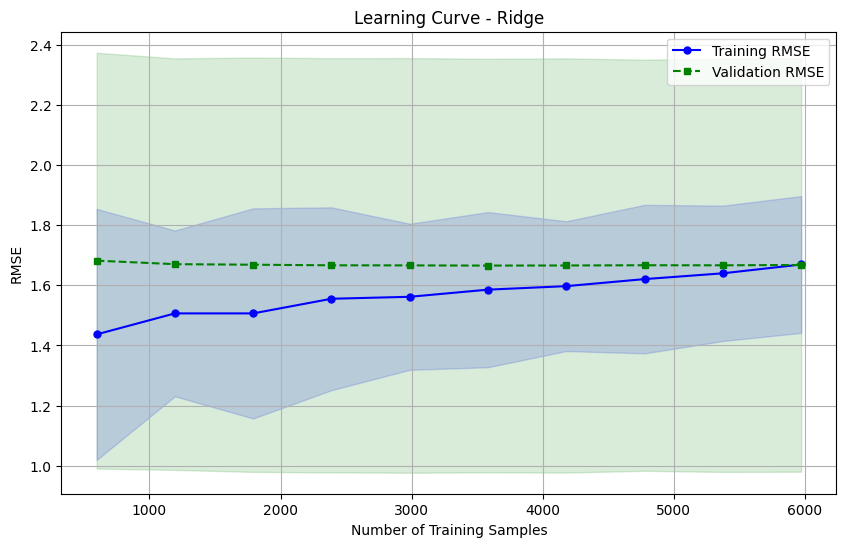

Learning Curve - XGBoost


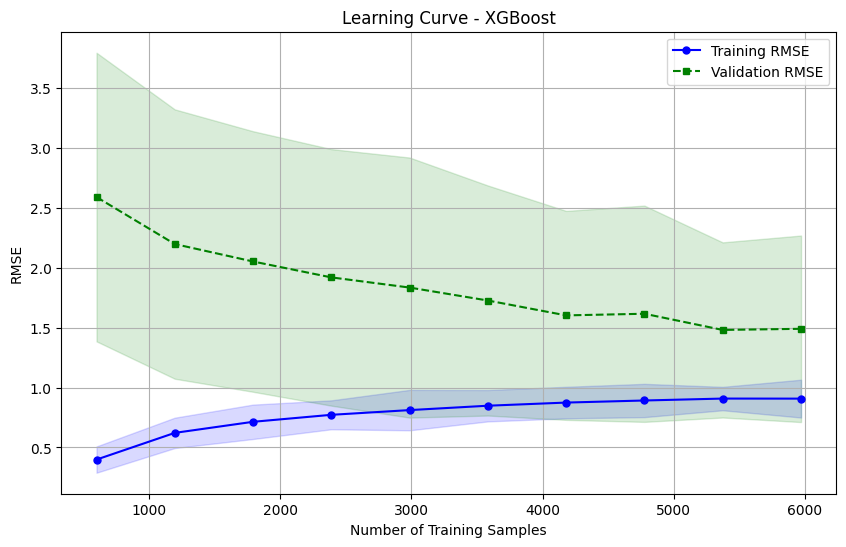

In [22]:
from sklearn.pipeline import Pipeline
# Define Models in a Pipeline
models = [
    ('Linear Regression', Pipeline([('scl', StandardScaler()), ('clf', LinearRegression())])),
    ('Ridge', Pipeline([('scl', StandardScaler()), ('clf', Ridge(alpha=1.0, random_state=42))])),
    ('XGBoost', Pipeline([('scl', StandardScaler()), ('clf', XGBRegressor(random_state=42))]))
]

# Function to plot learning curves
def plot_learning_curves(model, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, train_sizes=np.linspace(.1, 1, 10),
        scoring='neg_root_mean_squared_error', cv=10, random_state=42)

    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation RMSE')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of Training Samples')
    plt.ylabel('RMSE')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend(loc='best')
    plt.show()

# Plot Learning Curves for each model
for name, model in models:
    print(f'Learning Curve - {name}')
    plot_learning_curves(model, name)

In [23]:
# Import Libraries
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
import numpy as np
import pandas as pd

# Initialize RandomForest for Feature Selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform Boruta Feature Selection
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)
feat_selector.fit(X_train_scaled, y_train)

# List of All Features (excluding the target variable)
features = list(data3.drop(columns=['CO2 emissions (g/km)']).columns)

# Extracting the selected features
final_features = [features[i] for i in np.where(feat_selector.support_ == True)[0]]

# Get Feature Rankings
feature_ranks = feat_selector.ranking_
feature_importance = pd.DataFrame({'Feature': features, 'Rank': feature_ranks})

# Sort by Rank (Lower Rank = More Important)
feature_importance = feature_importance.sort_values(by='Rank')

# Print Final Selected Features
print("\nFinal Selected Features:")
print(final_features)

# Print Feature Importance Rankings
print("\nFeature Importance Rankings for CO2 emissions (g/km):")
print(feature_importance)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	16
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	16
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	16
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	16
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	16
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	16
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	16
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	16
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 

In [24]:
# Import required library
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric features (excluding target variable)
df_numeric = data3.drop(columns=['CO2 emissions (g/km)']).select_dtypes(include=[np.number])

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]
vif["Feature"] = df_numeric.columns

# Sort by VIF value (higher VIF = more multicollinearity)
vif = vif.sort_values(by="VIF Factor", ascending=False)

# Print VIF Results
print("\nVariance Inflation Factor (VIF) for Features:")
print(vif)



Variance Inflation Factor (VIF) for Features:
      VIF Factor                       Feature
5   69401.615822           Combined (L/100 km)
3   27221.943271               City (L/100 km)
4   10011.775051            Highway (L/100 km)
0     641.844970                    Model year
6     196.627944                Combined (mpg)
7     139.816374                    CO2 rating
2     106.188523                     Cylinders
1      69.781035               Engine size (L)
28     29.392850                   Fuel type_Z
27     27.805361                   Fuel type_X
9      19.708926                    Passengers
8      14.488072                   Smog rating
12      4.426812           Make_General Motors
22      4.217121        Transmission_Automatic
26      4.032055                   Fuel type_E
17      3.438523               Make_Stellantis
19      3.176253                   Make_Toyota
11      3.002253       Make_Ford Motor Company
20      2.862468         Make_Volkswagen Group
15      2.409

Model Evaluation - RMSE Scores
Linear Regression: 2.86
Ridge: 2.88
XGBoost: 2.36


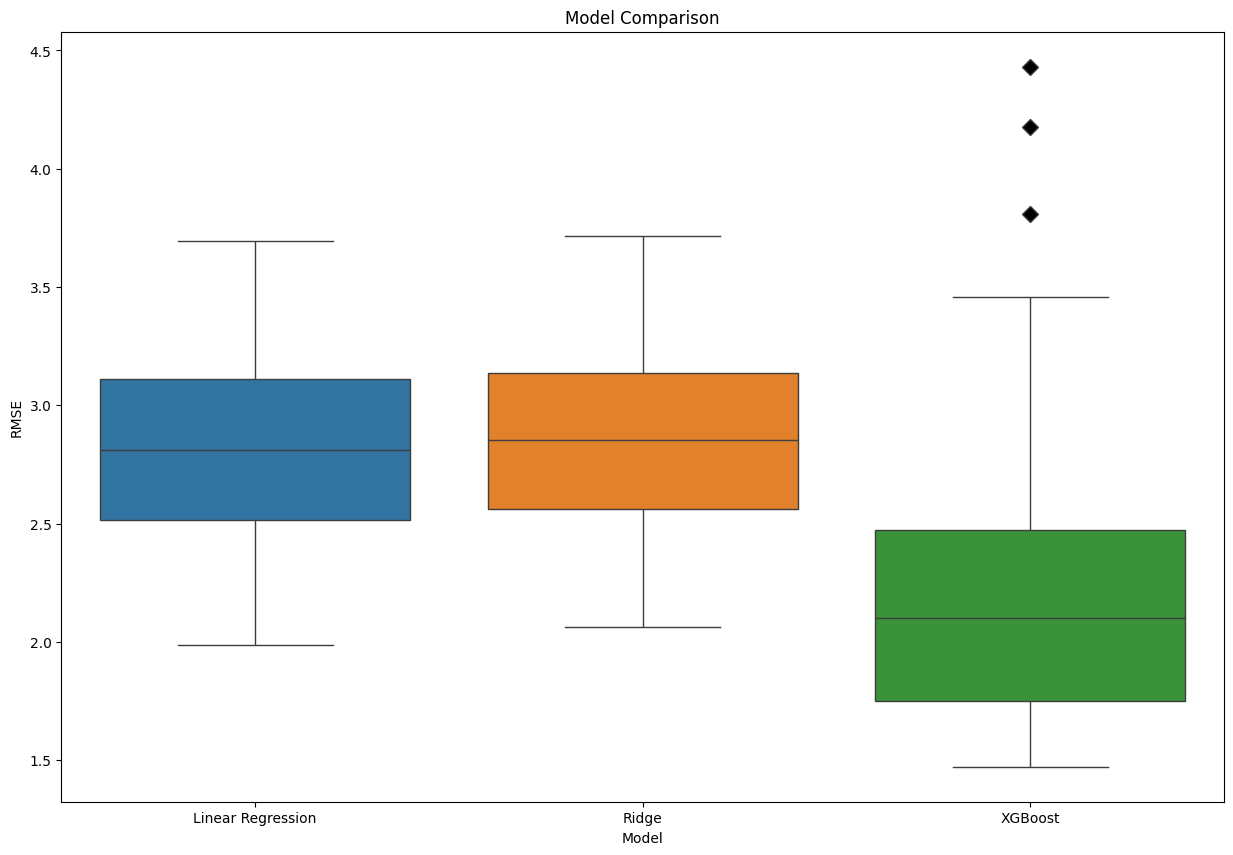

Learning Curve - Linear Regression


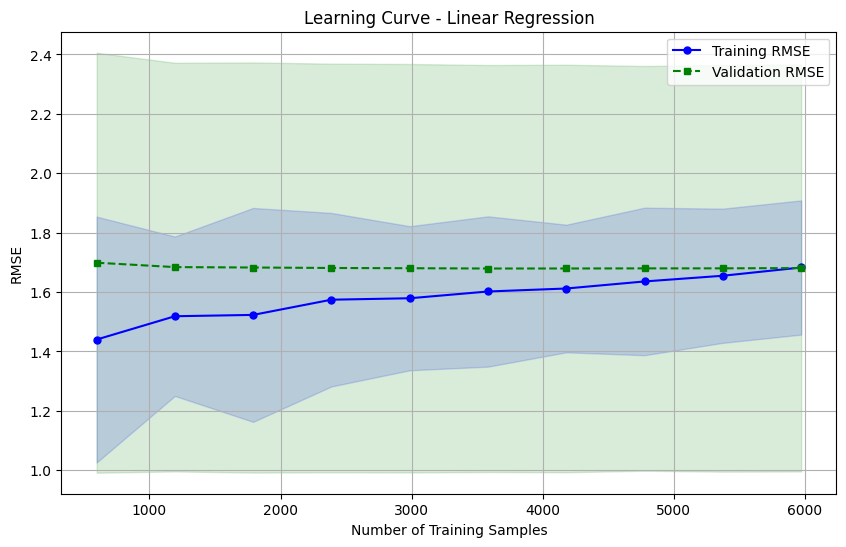

Learning Curve - Ridge


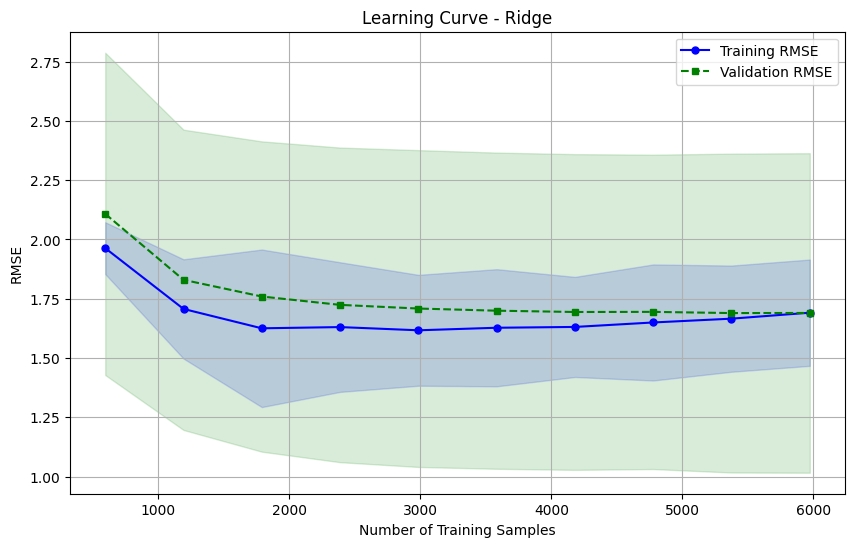

Learning Curve - XGBoost


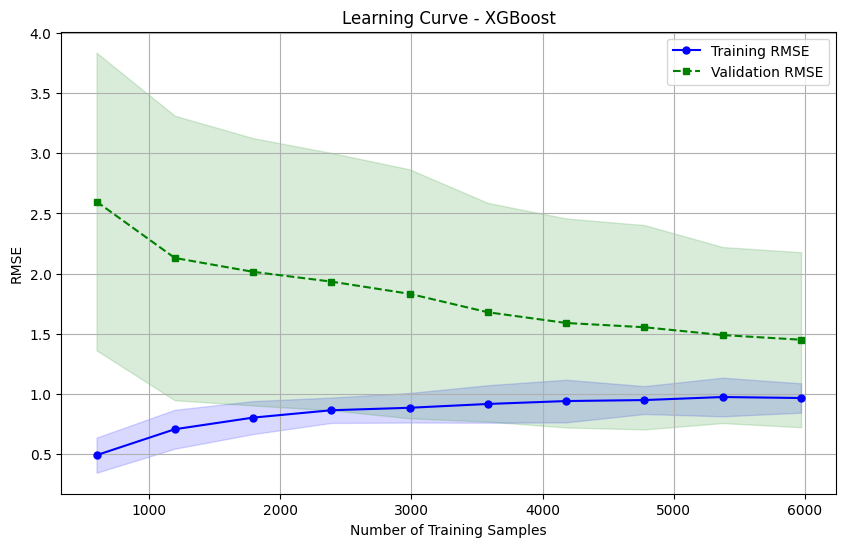

In [25]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, RepeatedKFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor

# Drop high multicollinearity feature
data4_reduced = data3.drop(columns=['City (L/100 km)', 'Highway (L/100 km)'])

# Define features (X) and target variable (y)
X = data4_reduced.drop('CO2 emissions (g/km)', axis=1).to_numpy()
y = data4_reduced['CO2 emissions (g/km)'].to_numpy()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Models in a Pipeline (Using RobustScaler)
models = [
    ('Linear Regression', Pipeline([('scl', RobustScaler()), ('clf', LinearRegression())])),
    ('Ridge', Pipeline([('scl', RobustScaler()), ('clf', Ridge(alpha=1.0, random_state=42))])),
    ('XGBoost', Pipeline([('scl', RobustScaler()), ('clf', XGBRegressor(random_state=42))]))
]

# Function to plot learning curves
def plot_learning_curves(model, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, train_sizes=np.linspace(.1, 1, 10),
        scoring='neg_root_mean_squared_error', cv=10, random_state=42)

    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation RMSE')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of Training Samples')
    plt.ylabel('RMSE')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend(loc='best')
    plt.show()

# Evaluate models using cross-validation
results = []
names = []
scoring = 'neg_mean_squared_error'

print('Model Evaluation - RMSE Scores')
for name, model in models:
    rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=rkf, scoring=scoring)  # Fixed X_train usage
    results.append(np.sqrt(-cv_results))
    names.append(name)
    print(f'{name}: {np.sqrt(-cv_results.mean()):.2f}')

# Boxplot View of Model Performance
plt.figure(figsize=(15, 10))
plt.title('Model Comparison')
sns.boxplot(data=results, flierprops={'marker': 'D', 'markersize': 8, 'markerfacecolor': 'black'})
plt.xticks(ticks=range(len(names)), labels=names)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

# Plot Learning Curves for each model
for name, model in models:
    print(f'Learning Curve - {name}')
    plot_learning_curves(model, name)

Original Train Dataset Size : 6636


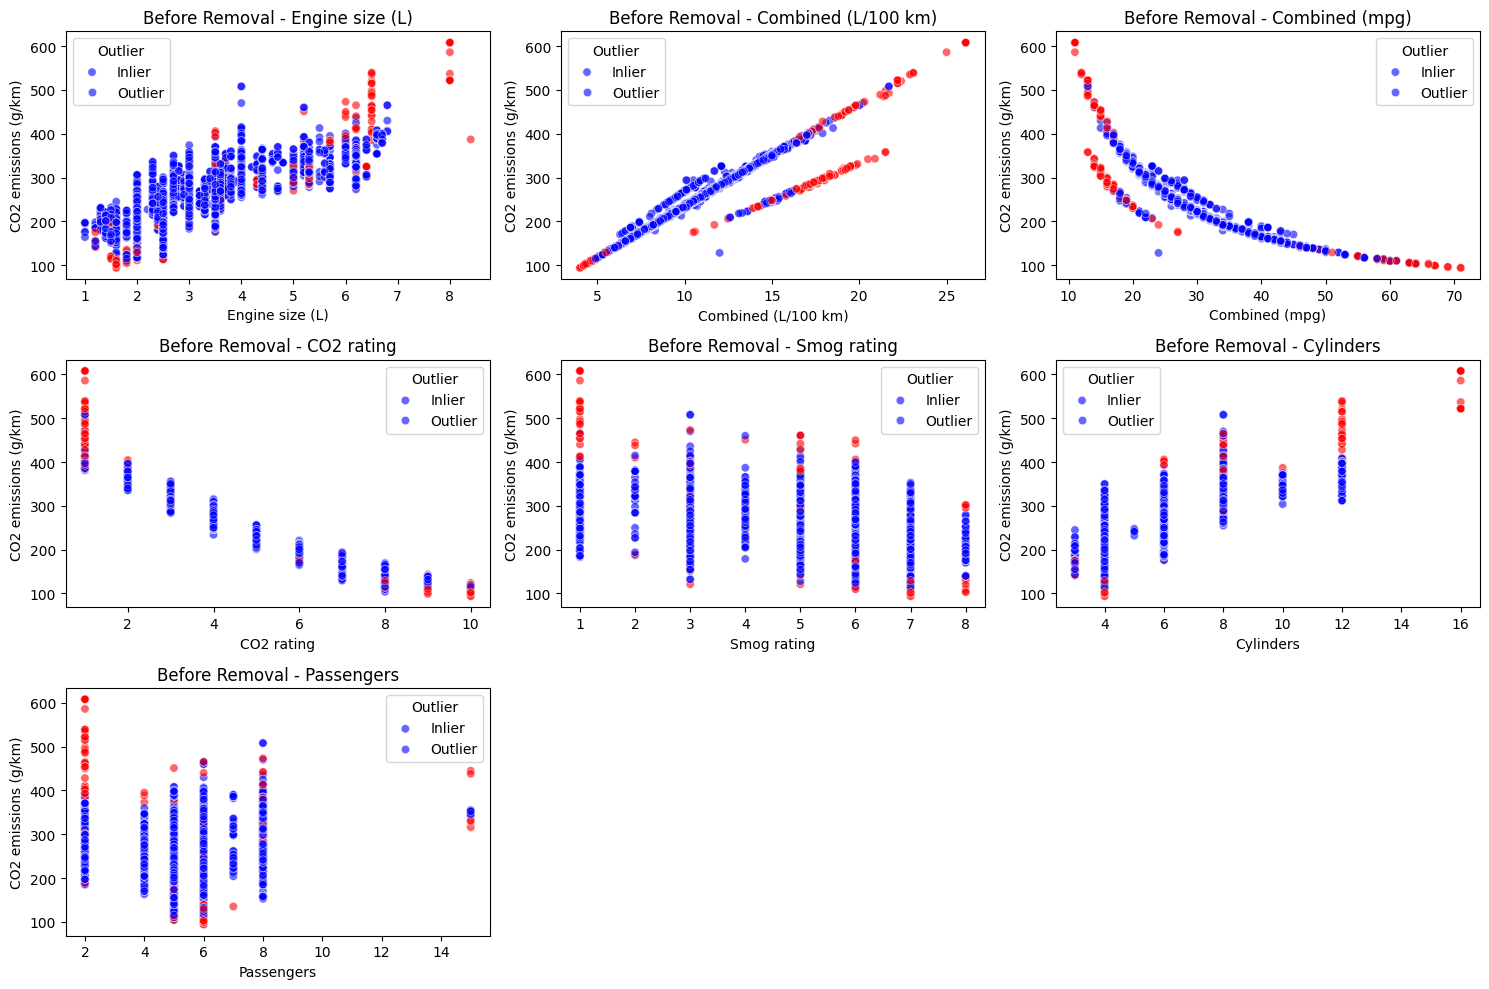

New Train Dataset Size      : 6305


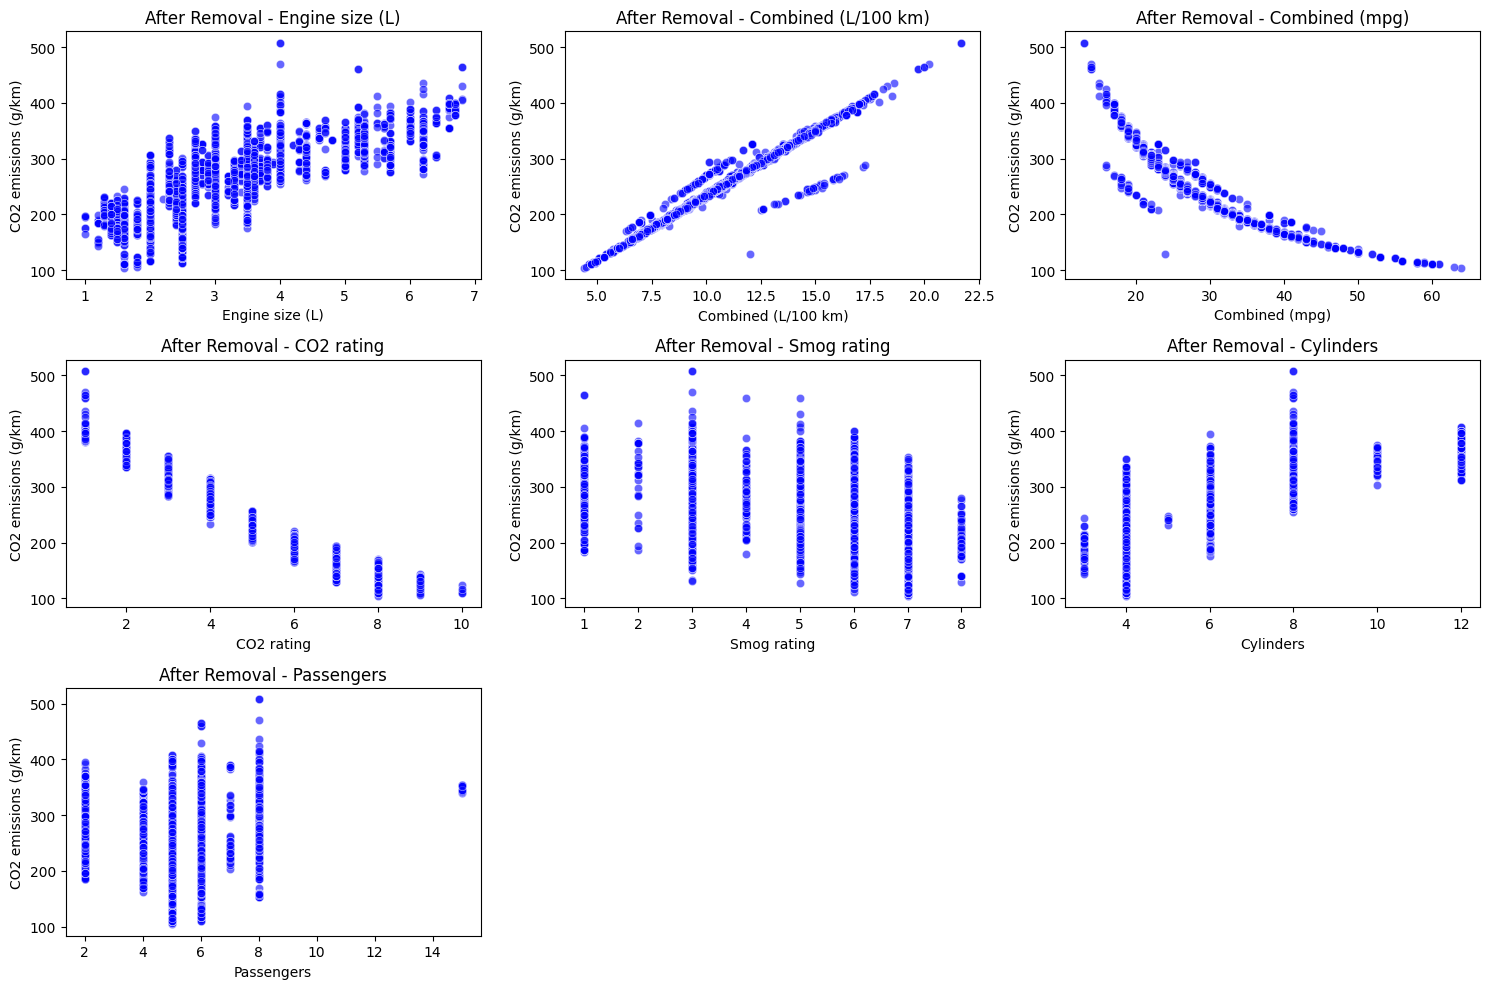

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for outlier detection
clf_all_features = IsolationForest(random_state=42, contamination=0.05)  # Adjust contamination if needed
clf_all_features.fit(X_train)  # Fit only on training data

# Predict whether a sample is an outlier (1 = inlier, -1 = outlier)
y_pred_train = clf_all_features.predict(X_train)

# Create a boolean mask for inliers (True) and outliers (False)
y_pred_train2 = np.array([True if x == 1 else False for x in y_pred_train])

# Convert X_train to DataFrame for visualization
df_outliers = pd.DataFrame(X_train, columns=data4_reduced.drop(columns=['CO2 emissions (g/km)']).columns)
df_outliers['CO2 emissions (g/km)'] = y_train  # Add correct target variable
df_outliers['Outlier'] = y_pred_train  # Add outlier column (-1 = outlier)

# Convert 'Outlier' column to string for seaborn
df_outliers['Outlier'] = df_outliers['Outlier'].astype(str)

# Define selected features
selected_features = ["Engine size (L)", "Combined (L/100 km)", "Combined (mpg)", "CO2 rating", "Smog rating", "Cylinders", "Passengers"]

# Print dataset size before removing outliers
print(f'Original Train Dataset Size : {len(X_train)}')

# Scatter Plot for Outliers Before Removal
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_features):
    plt.subplot(3, 3, i + 1)  
    sns.scatterplot(data=df_outliers, x=column, y='CO2 emissions (g/km)', hue='Outlier', palette={"1": "blue", "-1": "red"}, alpha=0.6)
    plt.title(f'Before Removal - {column}')
    plt.xlabel(column)
    plt.ylabel("CO2 emissions (g/km)")
    plt.legend(title="Outlier", labels=["Inlier", "Outlier"])

plt.tight_layout()
plt.show()

# Remove outliers from training data
X_train_mod = X_train[y_pred_train2]
y_train_mod = y_train[y_pred_train2]

# Print dataset size after removing outliers
print(f'New Train Dataset Size      : {len(X_train_mod)}')

# Convert modified X_train to DataFrame for visualization
df_no_outliers = pd.DataFrame(X_train_mod, columns=data4_reduced.drop(columns=['CO2 emissions (g/km)']).columns)
df_no_outliers['CO2 emissions (g/km)'] = y_train_mod  # Add correct target variable

# Scatter Plot for Inliers After Removing Outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_features):
    plt.subplot(3, 3, i + 1)  
    sns.scatterplot(data=df_no_outliers, x=column, y='CO2 emissions (g/km)', color="blue", alpha=0.6)
    plt.title(f'After Removal - {column}')
    plt.xlabel(column)
    plt.ylabel("CO2 emissions (g/km)")

plt.tight_layout()
plt.show()



Running GridSearchCV for Linear Regression

 ***Optimized Model: LinearRegression()***
Best Parameters: {}
R2 Score: 0.999
RMSE: 2.001
MAE: 1.162


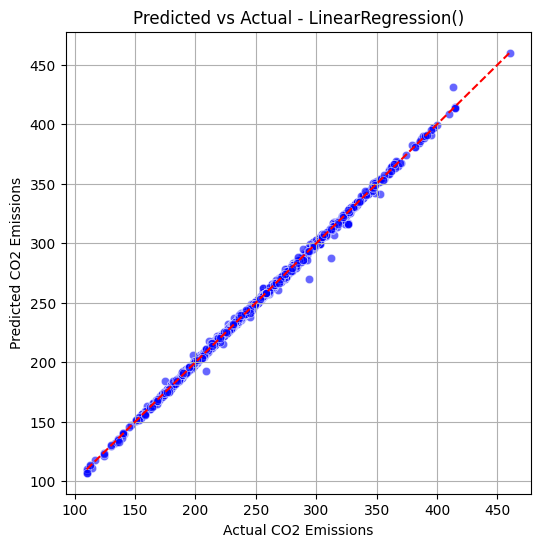


Running GridSearchCV for Ridge

 ***Optimized Model: Ridge(alpha=0.1, random_state=42)***
Best Parameters: {'clf__alpha': 0.1}
R2 Score: 0.999
RMSE: 2.002
MAE: 1.168


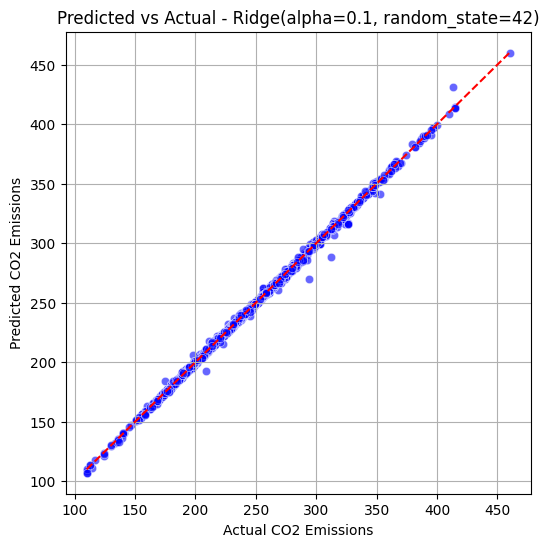


Running GridSearchCV for XGBoost

 ***Optimized Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)***
Best Parameters: {'clf__learning_rate': 0.2, 'clf__max_depth': 5, 'clf__n_estimators': 300}
R2 Score: 0.999
RMSE: 2.112
MAE: 1.035


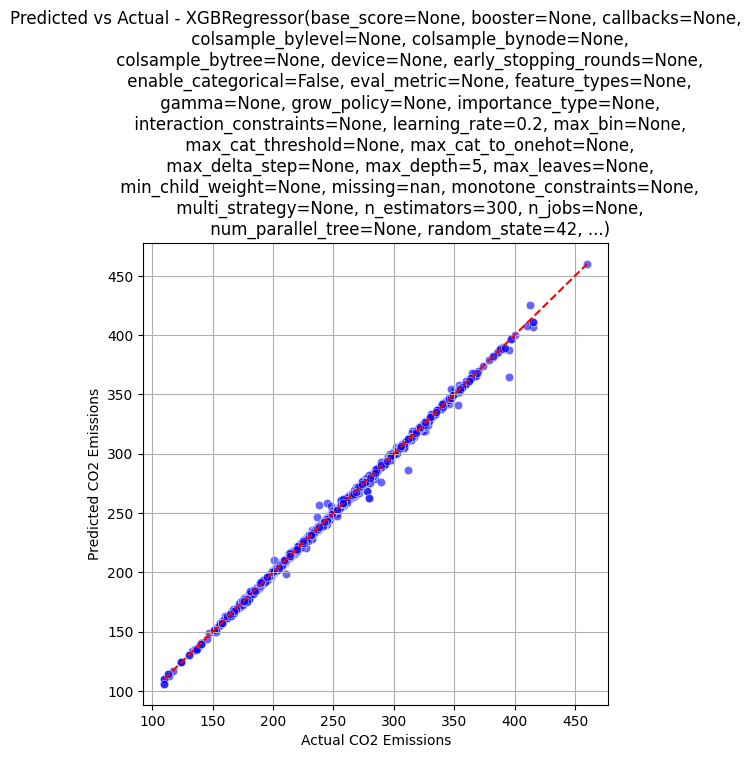

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define Train & Test Data (Using Outlier-Removed Dataset)
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_train_mod, y_train_mod, test_size=0.2, random_state=42)

# Define Regression Models with Pipelines (Using RobustScaler)
pipelines = [
    ('Linear Regression', Pipeline([('scl', RobustScaler()), ('clf', LinearRegression())])),
    ('Ridge', Pipeline([('scl', RobustScaler()), ('clf', Ridge(alpha=1.0, random_state=42))])),
    ('XGBoost', Pipeline([('scl', RobustScaler()), ('clf', XGBRegressor(random_state=42))]))
]

# Define Hyperparameter Grid
param_grid = [
    {},  # No hyperparameters for Linear Regression
    {'clf__alpha': [0.1, 1, 10, 100]},  # Ridge Regression
    {'clf__n_estimators': [100, 200, 300], 'clf__max_depth': [5, 10, 15], 'clf__learning_rate': [0.01, 0.1, 0.2]}  # XGBoost
]

# Function to Evaluate Models Using GridSearchCV
def evaluate_model(pipeline, params):
    # Perform Grid Search
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
    grid_search = GridSearchCV(pipeline, params, cv=cv, scoring='neg_root_mean_squared_error')
    grid_search.fit(X_train_final, y_train_final)

    # Best Model
    best_model = grid_search.best_estimator_

    # Predict on Test Data
    y_pred = best_model.predict(X_test_final)

    # Print Model Performance
    print(f'\n ***Optimized Model: {best_model.named_steps["clf"]}***')
    print(f'Best Parameters: {grid_search.best_params_}')

    # Performance Metrics
    r2 = r2_score(y_test_final, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_final, y_pred))
    mae = mean_absolute_error(y_test_final, y_pred)
    print(f'R2 Score: {r2:.3f}')
    print(f'RMSE: {rmse:.3f}')
    print(f'MAE: {mae:.3f}')

    # Plot Predicted vs Actual
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test_final, y=y_pred, alpha=0.6, color="blue")
    plt.plot([min(y_test_final), max(y_test_final)], [min(y_test_final), max(y_test_final)], color='red', linestyle='--')
    plt.xlabel("Actual CO2 Emissions")
    plt.ylabel("Predicted CO2 Emissions")
    plt.title(f'Predicted vs Actual - {best_model.named_steps["clf"]}')
    plt.grid()
    plt.show()

# ✅ Run GridSearchCV for Each Model
for (name, pipeline), params in zip(pipelines, param_grid):
    print(f'\nRunning GridSearchCV for {name}')
    evaluate_model(pipeline, params)



In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to check overfitting
def check_overfitting(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"\n**Checking Overfitting for {model_name}**")
    print(f"Train R² Score: {train_r2:.4f}")
    print(f"Test R² Score: {test_r2:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Train MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

    if train_r2 > 0.99 and test_r2 < 0.90:
        print("**Possible Overfitting Detected!** Model performs well on training but not on test data.")
    elif abs(train_r2 - test_r2) > 0.05:
        print("**Slight Overfitting Detected.** Consider reducing complexity or adding regularization.")
    else:
        print("**No Overfitting!** Model generalizes well.")

# Run for all models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.1, random_state=42),
    "XGBoost": XGBRegressor(learning_rate=0.2, max_depth=5, n_estimators=300, random_state=42)
}

for model_name, model in models.items():
    check_overfitting(model, model_name, X_train_mod, X_test, y_train_mod, y_test)



**Checking Overfitting for Linear Regression**
Train R² Score: 0.9987
Test R² Score: 0.9966
Train RMSE: 2.0095
Test RMSE: 3.6252
Train MAE: 1.1608
Test MAE: 1.5447
**No Overfitting!** Model generalizes well.

**Checking Overfitting for Ridge Regression**
Train R² Score: 0.9987
Test R² Score: 0.9966
Train RMSE: 2.0099
Test RMSE: 3.6435
Train MAE: 1.1638
Test MAE: 1.5511
**No Overfitting!** Model generalizes well.

**Checking Overfitting for XGBoost**
Train R² Score: 0.9997
Test R² Score: 0.9959
Train RMSE: 0.9146
Test RMSE: 3.9703
Train MAE: 0.6277
Test MAE: 1.3001
**No Overfitting!** Model generalizes well.


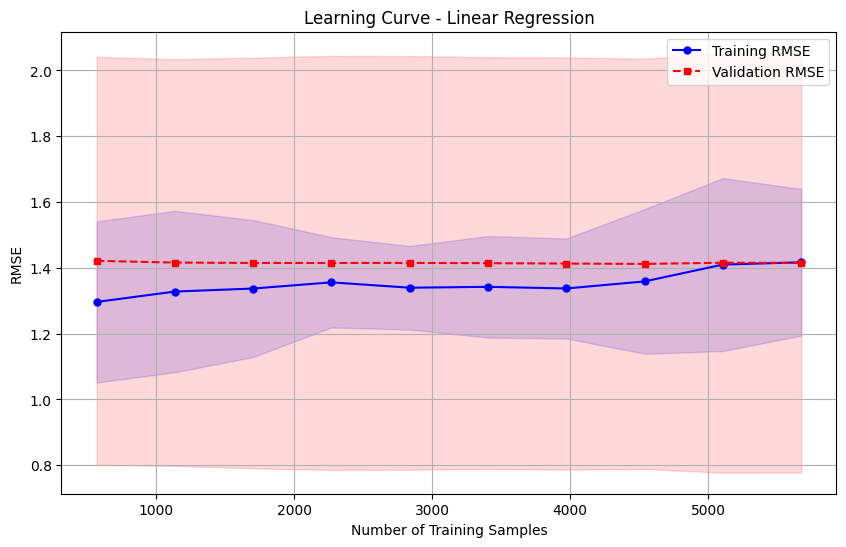

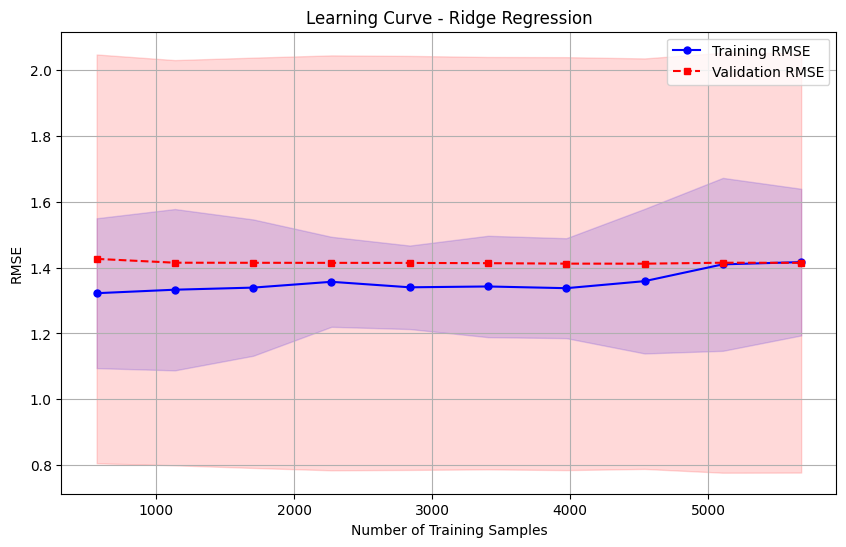

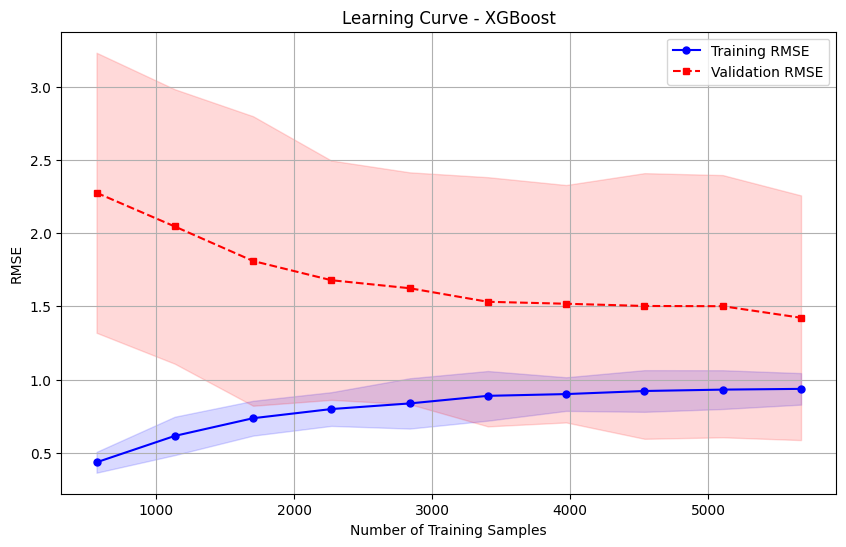

In [29]:
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(model, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_mod, y_train_mod, train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_root_mean_squared_error', cv=10, random_state=42)

    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='red', linestyle='--', marker='s', markersize=5, label='Validation RMSE')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')

    plt.grid()
    plt.xlabel('Number of Training Samples')
    plt.ylabel('RMSE')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend(loc='best')
    plt.show()

# Plot learning curves for each model
for model_name, model in models.items():
    plot_learning_curve(model, model_name)


In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Train Linear Regression Model on Outlier-Removed Data
lr_model = LinearRegression()
lr_model.fit(X_train_mod, y_train_mod)  # Using outlier-free training data

# Get Intercept
intercept = lr_model.intercept_

# Get Coefficients
coefficients = lr_model.coef_

# Create DataFrame for Coefficients
coef_table = pd.DataFrame({
    'Feature': data4_reduced.drop(columns=['CO2 emissions (g/km)']).columns,
    'Coefficient': coefficients
})

# Display Results
print(f"**Intercept:** {intercept:.4f}\n")
print("**Model Coefficients:**")
print(coef_table)

# Constructing the Model Equation
equation = "CO2 emissions (g/km) = {:.4f}".format(intercept)
for feature, coef in zip(coef_table['Feature'], coef_table['Coefficient']):
    equation += " + ({:.4f} * {})".format(coef, feature)

print("\n**Statistical Model Equation:**")
print(equation)



**Intercept:** -8.5627

**Model Coefficients:**
                         Feature  Coefficient
0                     Model year     0.025277
1                Engine size (L)    -0.000619
2                      Cylinders     0.134730
3            Combined (L/100 km)    22.801360
4                 Combined (mpg)    -0.101664
5                     CO2 rating    -0.588476
6                    Smog rating     0.058294
7                     Passengers     0.007962
8                   Make_Ferrari    -0.347292
9        Make_Ford Motor Company     1.559266
10           Make_General Motors     1.505420
11                    Make_Honda     0.763010
12      Make_Hyundai Motor Group     2.802302
13      Make_Mercedes-Benz Group     0.713858
14  Make_Nissan-Renault Alliance     1.601830
15               Make_Stellantis     1.041408
16                     Make_Tata     1.608288
17                   Make_Toyota     1.006077
18         Make_Volkswagen Group     0.805215
19                    Make_Volvo

In [31]:
import numpy as np
import xgboost as xgb
import pandas as pd

# Train the XGBoost Model (if not trained already)
xgb_final = xgb.XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.2, random_state=42)
xgb_final.fit(X_train_final, y_train_final) 

# Extract the base score (intercept)
bias_term = xgb_final.get_booster().attr('base_score')
if bias_term is None:
    bias_term = 0  # Default value if not found
else:
    bias_term = float(bias_term)  # Convert to float

# Extract feature importance
feature_importance = xgb_final.feature_importances_
feature_names = data4_reduced.drop(columns=['CO2 emissions (g/km)']).columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Generate an interpretable equation format
xgb_equation = f"CO2 Emissions (g/km) ≈ {bias_term:.4f} "
for index, row in feature_importance_df.iterrows():
    if row['Importance'] > 0.0001:  # Ignore near-zero importance features
        xgb_equation += f"+ ({row['Importance']:.4f} * {row['Feature']}) "

# Display the generated model equation
print("**XGBoost Model Equation:**")
print(xgb_equation)


**XGBoost Model Equation:**
CO2 Emissions (g/km) ≈ 0.0000 + (0.8918 * CO2 rating) + (0.0628 * Combined (L/100 km)) + (0.0345 * Fuel type_E) + (0.0032 * Make_General Motors) + (0.0022 * Fuel type_X) + (0.0012 * Transmission_Automatic) + (0.0007 * Make_Tata) + (0.0006 * Smog rating) + (0.0005 * Fuel type_Z) + (0.0005 * Engine size (L)) + (0.0004 * Model year) + (0.0003 * Make_Hyundai Motor Group) + (0.0003 * Cylinders) + (0.0002 * Make_Ford Motor Company) + (0.0001 * Make_Toyota) + (0.0001 * Make_Mercedes-Benz Group) + (0.0001 * Transmission_Dual-Clutch) 


In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the Ridge Regression Model
ridge_model = Ridge(alpha=0.1, random_state=42)
ridge_model.fit(X_train_final, y_train_final)

# Extract Intercept & Coefficients
intercept = ridge_model.intercept_
coefficients = ridge_model.coef_

# Create DataFrame for Feature Coefficients
feature_importance = pd.DataFrame({
    "Feature": data4_reduced.drop(columns=['CO2 emissions (g/km)']).columns,
    "Coefficient": coefficients
})

# Sort by absolute coefficient values (most influential features)
feature_importance = feature_importance.reindex(feature_importance["Coefficient"].abs().sort_values(ascending=False).index)

# Model Performance Metrics
y_pred = ridge_model.predict(X_test_final)
r2 = r2_score(y_test_final, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test_final) - 1) / (len(y_test_final) - X_train_final.shape[1] - 1)
mae = mean_absolute_error(y_test_final, y_pred)
mse = mean_squared_error(y_test_final, y_pred)
rmse = np.sqrt(mse)

# Display Model Performance Metrics
print("\n**Model Performance Metrics**")
print(f"Intercept (Bias Term): {intercept:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")

# Display Full Feature Coefficients
print("**Feature Coefficients for Ridge Regression:**")
print(feature_importance.to_string(index=False))

# Generate Model Equation
ridge_equation = f"\n**Ridge Regression Model Equation:**\nCO2 emissions (g/km) = {intercept:.4f} "
for index, row in feature_importance.iterrows():
    ridge_equation += f"+ ({row['Coefficient']:.4f} * {row['Feature']}) "
    
# Print the Ridge Regression Model Equation
print(ridge_equation)

# Extract & Display Only the Top 10 Features (Without Values)
top_features = feature_importance["Feature"].head(10).tolist()
print("\n**Top Features (Most Impactful Variables):**")
for feature in top_features:
    print(f" {feature}")



**Model Performance Metrics**
Intercept (Bias Term): -25.3769
R² Score: 0.9987
Adjusted R² Score: 0.9987
Mean Absolute Error (MAE): 1.1668
Mean Squared Error (MSE): 4.0075
Root Mean Squared Error (RMSE): 2.0019

**Feature Coefficients for Ridge Regression:**
                     Feature  Coefficient
                 Fuel type_E  -133.491318
                 Fuel type_Z   -31.784054
                 Fuel type_X   -31.777076
         Combined (L/100 km)    22.725799
    Make_Hyundai Motor Group     2.676929
                   Make_Tata     1.586603
         Make_General Motors     1.550672
     Make_Ford Motor Company     1.531931
Make_Nissan-Renault Alliance     1.506056
             Make_Stellantis     1.019317
                 Make_Toyota     1.012864
       Make_Volkswagen Group     0.741664
                  Make_Honda     0.676477
                  CO2 rating    -0.663753
    Make_Mercedes-Benz Group     0.527231
                Make_Ferrari    -0.382195
                  Make_Vol

In [34]:
data = pd.read_excel("C:/Users/ajayk/Downloads/Cars_leaned.xlsx") #fetch from sheetname


In [40]:
data3

,Model year,Engine size (L),Cylinders,Combined (L/100 km),Combined (mpg),CO2 rating,Smog rating,Make_Ferrari,Make_Ford Motor Company,Make_General Motors,...,Make_Toyota,Make_Volkswagen Group,Make_Volvo,Transmission_Automatic,Transmission_CVT,Transmission_Dual-Clutch,Transmission_Manual,Fuel type_E,Fuel type_X,Fuel type_Z
0,2017,2.4,4,8.2,34,7,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2017,3.0,6,9.0,31,6,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2017,3.5,6,11.0,26,4,6,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2017,3.5,6,10.7,26,5,6,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2017,3.5,6,11.0,26,4,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,2025,2.0,4,8.7,32,5,4,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8292,2025,2.0,4,9.5,30,5,6,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8293,2025,2.0,4,9.1,31,5,4,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8294,2025,2.0,4,9.0,31,5,6,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [5]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_excel("Cars_leaned.xlsx")

# Define mappings
brand_mapping = {
    'Toyota': 'Toyota', 'Lexus': 'Toyota', 'Mazda': 'Toyota', 'Subaru': 'Toyota',
    'Volkswagen': 'Volkswagen Group', 'Audi': 'Volkswagen Group', 'Porsche': 'Volkswagen Group', 'Bentley': 'Volkswagen Group', 
    'Bugatti': 'Volkswagen Group', 'Lamborghini': 'Volkswagen Group', 
    'Chevrolet': 'General Motors', 'GMC': 'General Motors', 'Cadillac': 'General Motors', 'Buick': 'General Motors',
    'Ford': 'Ford Motor Company', 'Lincoln': 'Ford Motor Company', 'Jaguar': 'Ford Motor Company',
    'Chrysler': 'Stellantis', 'Dodge': 'Stellantis', 'Jeep': 'Stellantis', 'Ram': 'Stellantis', 
    'FIAT': 'Stellantis', 'Maserati': 'Stellantis', 'Alfa Romeo': 'Stellantis',
    'Honda': 'Honda', 'Acura': 'Honda',
    'Hyundai': 'Hyundai Motor Group', 'Kia': 'Hyundai Motor Group', 'Genesis': 'Hyundai Motor Group',
    'BMW': 'BMW Group', 'MINI': 'BMW Group', 'Rolls-Royce': 'BMW Group',
    'Mercedes-Benz': 'Mercedes-Benz Group', 'Aston Martin': 'Mercedes-Benz Group',
    'Nissan': 'Nissan-Renault Alliance', 'Infiniti': 'Nissan-Renault Alliance', 'Mitsubishi': 'Nissan-Renault Alliance',
    'Ferrari': 'Ferrari', 'Land Rover': 'Tata', 'Jaguar': 'Tata', 'Volvo': 'Volvo'
}

transmission_mapping = {
    'M5': 'Manual', 'M6': 'Manual', 'M7': 'Manual',
    'A4': 'Automatic', 'A5': 'Automatic', 'A6': 'Automatic', 'A7': 'Automatic', 'A8': 'Automatic', 'A9': 'Automatic', 'A10': 'Automatic',
    'AS5': 'Automated Manual', 'AS6': 'Automated Manual', 'AS7': 'Automated Manual', 'AS8': 'Automated Manual', 'AS9': 'Automated Manual', 'AS10': 'Automated Manual',
    'AM6': 'Dual-Clutch', 'AM7': 'Dual-Clutch', 'AM8': 'Dual-Clutch', 'AM9': 'Dual-Clutch',
    'AV': 'CVT', 'AV6': 'CVT', 'AV7': 'CVT', 'AV8': 'CVT', 'AV10': 'CVT', 'AV1': 'CVT'
}

# Apply mappings to the dataset
data_mapped = data.copy()
data_mapped['Make'] = data_mapped['Make'].map(brand_mapping)
data_mapped['Transmission'] = data_mapped['Transmission'].map(transmission_mapping)

# Define categorical columns for encoding
categorical_cols = ['Make', 'Transmission', 'Fuel type']

# Fit OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)
data_categorical = data_mapped[categorical_cols]
ohe.fit(data_categorical)

# Encode categorical data
encoded_data = ohe.transform(data_categorical)
feature_names = ohe.get_feature_names_out(categorical_cols)
data_encoded = pd.DataFrame(encoded_data, columns=feature_names).astype(int)

# **Train Imputation Models**
# Prepare data for imputation models (using available sample input features)
X_impute = pd.concat([data_mapped["Model year"], data_encoded], axis=1)
y_engine_size = data["Engine size (L)"]
y_cylinders = data["Cylinders"]

# Train and save imputation models
engine_size_model = XGBRegressor(n_estimators=100, random_state=42)
engine_size_model.fit(X_impute, y_engine_size)
joblib.dump(engine_size_model, "engine_size_imputer.joblib")
print("Saved Engine Size imputation model")

cylinders_model = XGBRegressor(n_estimators=100, random_state=42)
cylinders_model.fit(X_impute, y_cylinders)
joblib.dump(cylinders_model, "cylinders_imputer.joblib")
print("Saved Cylinders imputation model")

# **Train Main Prediction Models**
# Define input features (excluding target-related features)
numerical_cols = ["Model year", "Engine size (L)", "Cylinders"]
input_features = numerical_cols + list(feature_names)
X_main = pd.concat([data_mapped[numerical_cols], data_encoded], axis=1)

# Define targets
targets = ["CO2 emissions (g/km)", "Combined (L/100 km)", "City (L/100 km)", "Highway (L/100 km)", "Smog rating"]

# Train and save a model for each target
for target in targets:
    y_target = data[target]
    model = XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.2, random_state=42)
    model.fit(X_main, y_target)
    model_filename = f"xgboost_model_{target.replace(' ', '_').replace('/', '_')}.joblib"
    joblib.dump(model, model_filename)
    print(f"Saved model for {target}: {model_filename}")

Saved Engine Size imputation model
Saved Cylinders imputation model
Saved model for CO2 emissions (g/km): xgboost_model_CO2_emissions_(g_km).joblib
Saved model for Combined (L/100 km): xgboost_model_Combined_(L_100_km).joblib
Saved model for City (L/100 km): xgboost_model_City_(L_100_km).joblib
Saved model for Highway (L/100 km): xgboost_model_Highway_(L_100_km).joblib
Saved model for Smog rating: xgboost_model_Smog_rating.joblib


In [24]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Load the dataset (for preprocessing and vehicle class range calculation)

# Define mappings (same as in training)
brand_mapping = {
    'Toyota': 'Toyota', 'Lexus': 'Toyota', 'Mazda': 'Toyota', 'Subaru': 'Toyota',
    'Volkswagen': 'Volkswagen Group', 'Audi': 'Volkswagen Group', 'Porsche': 'Volkswagen Group', 'Bentley': 'Volkswagen Group', 
    'Bugatti': 'Volkswagen Group', 'Lamborghini': 'Volkswagen Group', 
    'Chevrolet': 'General Motors', 'GMC': 'General Motors', 'Cadillac': 'General Motors', 'Buick': 'General Motors',
    'Ford': 'Ford Motor Company', 'Lincoln': 'Ford Motor Company', 'Jaguar': 'Ford Motor Company',
    'Chrysler': 'Stellantis', 'Dodge': 'Stellantis', 'Jeep': 'Stellantis', 'Ram': 'Stellantis', 
    'FIAT': 'Stellantis', 'Maserati': 'Stellantis', 'Alfa Romeo': 'Stellantis',
    'Honda': 'Honda', 'Acura': 'Honda',
    'Hyundai': 'Hyundai Motor Group', 'Kia': 'Hyundai Motor Group', 'Genesis': 'Hyundai Motor Group',
    'BMW': 'BMW Group', 'MINI': 'BMW Group', 'Rolls-Royce': 'BMW Group',
    'Mercedes-Benz': 'Mercedes-Benz Group', 'Aston Martin': 'Mercedes-Benz Group',
    'Nissan': 'Nissan-Renault Alliance', 'Infiniti': 'Nissan-Renault Alliance', 'Mitsubishi': 'Nissan-Renault Alliance',
    'Ferrari': 'Ferrari', 'Land Rover': 'Tata', 'Jaguar': 'Tata', 'Volvo': 'Volvo'
}

transmission_mapping = {
    'M5': 'Manual', 'M6': 'Manual', 'M7': 'Manual',
    'A4': 'Automatic', 'A5': 'Automatic', 'A6': 'Automatic', 'A7': 'Automatic', 'A8': 'Automatic', 'A9': 'Automatic', 'A10': 'Automatic',
    'AS5': 'Automated Manual', 'AS6': 'Automated Manual', 'AS7': 'Automated Manual', 'AS8': 'Automated Manual', 'AS9': 'Automated Manual', 'AS10': 'Automated Manual',
    'AM6': 'Dual-Clutch', 'AM7': 'Dual-Clutch', 'AM8': 'Dual-Clutch', 'AM9': 'Dual-Clutch',
    'AV': 'CVT', 'AV6': 'CVT', 'AV7': 'CVT', 'AV8': 'CVT', 'AV10': 'CVT', 'AV1': 'CVT'
}

# Apply mappings to the dataset
data_mapped = data.copy()
data_mapped['Make'] = data_mapped['Make'].map(brand_mapping)
data_mapped['Transmission'] = data_mapped['Transmission'].map(transmission_mapping)

# Fit OneHotEncoder (consistent with training)
categorical_cols = ['Make', 'Transmission', 'Fuel type']
ohe = OneHotEncoder(drop='first', sparse_output=False)
data_categorical = data_mapped[categorical_cols]
ohe.fit(data_categorical)

# Load the imputation models
engine_size_model = joblib.load("engine_size_imputer.joblib")
cylinders_model = joblib.load("cylinders_imputer.joblib")

# Load the main prediction models
co2_model = joblib.load("xgboost_model_CO2_emissions_(g_km).joblib")
combined_fuel_model = joblib.load("xgboost_model_Combined_(L_100_km).joblib")
city_fuel_model = joblib.load("xgboost_model_City_(L_100_km).joblib")
highway_fuel_model = joblib.load("xgboost_model_Highway_(L_100_km).joblib")
smog_model = joblib.load("xgboost_model_Smog_rating.joblib")

# Define sample input
sample_input = {
    "Model year": 2022,
    "Make": "Chevrolet",
    "Transmission": "Automatic",
    "Fuel type": "X"
}

# Convert sample input to DataFrame
sample_df = pd.DataFrame([sample_input])

# Apply mappings to sample input
sample_df['Make'] = sample_df['Make'].map(brand_mapping)

# One-hot encode categorical variables
input_categorical = sample_df[categorical_cols]
encoded_data = ohe.transform(input_categorical)
sample_encoded_categorical = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_cols)).astype(int)

# Impute missing numerical features
X_impute_sample = pd.concat([sample_df["Model year"], sample_encoded_categorical], axis=1)
engine_size_pred = engine_size_model.predict(X_impute_sample)[0]
cylinders_pred = int(round(cylinders_model.predict(X_impute_sample)[0]))

# Add imputed values to sample DataFrame
sample_df["Engine size (L)"] = engine_size_pred
sample_df["Cylinders"] = cylinders_pred

# Prepare input for main prediction models
numerical_cols = ["Model year", "Engine size (L)", "Cylinders"]
sample_main = pd.concat([sample_df[numerical_cols], sample_encoded_categorical], axis=1)

# Make predictions
co2_prediction = co2_model.predict(sample_main)[0]
combined_fuel = combined_fuel_model.predict(sample_main)[0]
city_fuel = city_fuel_model.predict(sample_main)[0]
highway_fuel = highway_fuel_model.predict(sample_main)[0]
smog_rating = int(round(smog_model.predict(sample_main)[0]))

# Calculate additional EnerGuide label values
combined_mpg = 235.215 / combined_fuel if combined_fuel > 0 else 0
annual_fuel_cost = (combined_fuel * 20000 / 100) * 1.09  # 20,000 km, $1.09 per litre

# Determine vehicle class range (simplified approach)
mapped_make = brand_mapping.get(sample_input["Make"], sample_input["Make"])
vehicle_class = data[data["Make"] == mapped_make]["Vehicle class"].mode().iloc[0] if mapped_make in data["Make"].values else "Sport utility vehicle: Small"
vehicle_class_ranges = data.groupby("Vehicle class")["Combined (L/100 km)"].agg(["min", "max"]).to_dict()
vehicle_class_range = f"{vehicle_class_ranges['min'][vehicle_class]:.1f} – {vehicle_class_ranges['max'][vehicle_class]:.1f}"

# Print the predictions
print("Sample Input:")
for key, value in sample_input.items():
    print(f"{key}: {value}")
print("\nEnerGuide Label Outputs:")
print(f"Combined Fuel Consumption: {combined_fuel:.1f} L/100 km")
print(f"City Fuel Consumption: {city_fuel:.1f} L/100 km")
print(f"Highway Fuel Consumption: {highway_fuel:.1f} L/100 km")
print(f"Combined MPG: {int(round(combined_mpg))}")
print(f"Annual Fuel Cost: ${int(round(annual_fuel_cost))}")
print(f"Vehicle Class Range: {vehicle_class_range} L/100 km")
print(f"CO2 Emissions: {co2_prediction:.2f} g/km")
print(f"Smog Rating: {smog_rating}")

Sample Input:
Model year: 2022
Make: Chevrolet
Transmission: Automatic
Fuel type: X

EnerGuide Label Outputs:
Combined Fuel Consumption: 13.9 L/100 km
City Fuel Consumption: 15.3 L/100 km
Highway Fuel Consumption: 12.0 L/100 km
Combined MPG: 17
Annual Fuel Cost: $3033
Vehicle Class Range: 4.4 – 16.8 L/100 km
CO2 Emissions: 327.27 g/km
Smog Rating: 6
